In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import cv2
import os
import pickle
import random
import keras
import imageio

Using TensorFlow backend.


In [3]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# baseline model with dropout for the dogs vs cats dataset
from keras.layers import Dropout

In [4]:
from keras.datasets import cifar10
#importing other required libraries
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.applications import VGG19 #For Transfer Learning
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# fold-1

In [6]:
x = np.load('pannuke\\Fold_1\\images\\images.npy')
y = np.load('pannuke\\Fold_1\\images\\types.npy')

In [7]:
from sklearn.model_selection import train_test_split
xx_train, x_test, yy_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

xx_train.shape, x_test.shape, yy_train.shape, y_test.shape

((2257, 256, 256, 3), (399, 256, 256, 3), (2257,), (399,))

In [8]:
x_train, x_val, y_train, y_val = train_test_split(xx_train, yy_train, test_size=0.20, random_state=42)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((1805, 256, 256, 3), (452, 256, 256, 3), (1805,), (452,))

In [9]:
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((1805, 256, 256, 3),
 (452, 256, 256, 3),
 (399, 256, 256, 3),
 (1805,),
 (452,),
 (399,))

In [10]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# integer encode
label_encoder2 = LabelEncoder()
integer_encoded2 = label_encoder2.fit_transform(y_train)
print(integer_encoded2)

print(y_train)
# binary encode
onehot_encoder2 = OneHotEncoder(sparse=False)
integer_encoded2 = integer_encoded2.reshape(len(integer_encoded2), 1)
onehot_encoded2 = onehot_encoder2.fit_transform(integer_encoded2)
print(onehot_encoded2)

y_train = onehot_encoded2

[ 3  9 11 ...  5  3  6]
['Breast' 'Liver' 'Ovarian' ... 'Colon' 'Breast' 'Esophagus']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# integer encode
label_encoder2 = LabelEncoder()
integer_encoded2 = label_encoder2.fit_transform(y_val)
print(integer_encoded2)

print(y_val)
# binary encode
onehot_encoder2 = OneHotEncoder(sparse=False)
integer_encoded2 = integer_encoded2.reshape(len(integer_encoded2), 1)
onehot_encoded2 = onehot_encoder2.fit_transform(integer_encoded2)
print(onehot_encoded2)

y_val = onehot_encoded2

[ 3  9  5  3  5  3  3  8  0  2  6  3  3  3  5  6 12 11  5  3  5  0  4  3
  8  3 12  5  3  5  3 10  3  3  5  0  6 10 15 13  0  4 15  5  7  3  5  3
 11  5  0  3  5  3 16  3  3  3  3  5  5  6  1  0 13  3  3  5  3  3  7  4
  3  3  3  9 11  3  3  5  1 17 14  3  5  4  1 18  1  5  1  3  5  4  4  7
  5  3  3 17 17  5  3 17  5  6  3  3 11  3  1 13  3  0  3  1  3 18 10  5
  3  9  3 12  3 11  3  5  5  1  5  6  6  6  6  4 17  3  3  1  9 11  3  2
  3  5 12  3  5  3  5  3 10  3  3 11  1  6  0  2 10  9  6  4  4  5 17  5
  3  3  9  3  0  5  5  5 10  3  5  0  3  0 18  3 17  3 12  3  3  5  3  5
  3  7  4  5 17 17 12  6 13 13 16  0 16  1 12 11 11  6 10  5  1  3  6  5
  4  5  3 16  1  3  3  4  1 17  6  8  5  4  0  1 16  4  6  0 14  3  3 12
  5 18  3  6 15  0 14 15 17  3  3  3  3  6  4  6 16  3  3 14  5  3  4  5
  6  5  5  3  0  3  0 14  7  5 12  8  5  0 14  3  1  0  3  0  5  3  5  3
 15  6  5  6  3  4  5 14  0  5  3  5  9  3  3  0 14  3  1 17 11  3  3  3
  4  0  3  1  1  4  5 13  0  3 14  0  3  9  3  3 17

In [12]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# integer encode
label_encoder2 = LabelEncoder()
integer_encoded2 = label_encoder2.fit_transform(y_test)
print(integer_encoded2)

print(y_test)
# binary encode
onehot_encoder2 = OneHotEncoder(sparse=False)
integer_encoded2 = integer_encoded2.reshape(len(integer_encoded2), 1)
onehot_encoded2 = onehot_encoder2.fit_transform(integer_encoded2)
print(onehot_encoded2)

y_test = onehot_encoded2

[ 5  3  1  1  3  3  5  5  3  3  0  3  3  4  3  3  3  5  1  4  5  1 10  7
 17 10  3  8 11  5  0  3  1  3  5  5  4  3  5  3  5  3  3  1 12 16  3  3
  3  5  4  4  8  3  3  3  1  3  5 11  4  1  3 13  3  3  3  5  3 13  5  7
 14  6  4  3  5  9  8  5  5  6  1  5  0 15  5  3  3  0  5 15 15 14  3  3
  1  6  1  3 11  3 17 10 13  6  3  5  4  5  3  3 16  3  8  5  1  6  5 18
  0  6  5 17 10  3  5  3  8  3  2 17  3  1  3  3  3 12  1  3 11  5 13  1
  7  4  3  4  7 14  5 14  3 15  6  8  5  3 17 15  1  5  5 17 13  5  3  5
  5  3  3  3 16  3  6  5  1  3  5  0  4  4  0  9  4  6 14  3  5  5  3  4
  0  5  0  3  7 15  0  5  3 11  5  5 10  3  3  3  5  9  2  1  3 17  5 16
  9  1 15 11  5 14  5  3  3 14  1 12  6  3  6  5  0  4 10  3  3  3  1  4
  5 17 13  5  6  7 17 17 13  3 13 10  3 13 15  7  5  9 12  6  5  5 16 10
  3 12  3  3  7  3  2  3 16  1 14  3  3 16 11 17  5  3  4  4  5  5  5  5
  3  3  3  4  3  3  1  6  1 17  3  9 14  6 13  3  7 12  0  5  3  3  3  5
  1 18 10 12  3  0  6  0  5  5  3 12 12  3  3  7  6

In [13]:
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((1805, 256, 256, 3),
 (452, 256, 256, 3),
 (399, 256, 256, 3),
 (1805, 19),
 (452, 19),
 (399, 19))

# Modeling

In [13]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(256, 256, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(19, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# define model
model = define_model()

In [14]:
# fit model
history = model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1, validation_data=(x_val, y_val))

Train on 2031 samples, validate on 359 samples
Epoch 1/20
2031/2031 [==============================] - 9s 4ms/step - loss: 20521.7386 - accuracy: 0.2787 - val_loss: 2.9160 - val_accuracy: 0.3287
Epoch 2/20
2031/2031 [==============================] - 5s 2ms/step - loss: 2.8952 - accuracy: 0.3127 - val_loss: 2.8689 - val_accuracy: 0.3287
Epoch 3/20
2031/2031 [==============================] - 5s 3ms/step - loss: 2.8502 - accuracy: 0.3127 - val_loss: 2.8228 - val_accuracy: 0.3287
Epoch 4/20
2031/2031 [==============================] - 5s 3ms/step - loss: 2.8071 - accuracy: 0.3127 - val_loss: 2.7779 - val_accuracy: 0.3287
Epoch 5/20
2031/2031 [==============================] - 5s 3ms/step - loss: 2.7620 - accuracy: 0.3127 - val_loss: 2.7295 - val_accuracy: 0.3287
Epoch 6/20
2031/2031 [==============================] - 5s 3ms/step - loss: 2.7166 - accuracy: 0.3127 - val_loss: 2.6835 - val_accuracy: 0.3287
Epoch 7/20
2031/2031 [==============================] - 5s 3ms/step - loss: 2.6672 - 

In [15]:
[test_loss, test_acc] = model.evaluate(x_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

266/266 [==============================] - 1s 2ms/step
Evaluation result on Test Data : Loss = 2.4577671997529222, accuracy = 0.27819550037384033


In [16]:
# evaluate model
_, acc = model.evaluate(x_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

266/266 [==============================] - 0s 1ms/step
> 27.820


In [21]:
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((2031, 256, 256, 3),
 (359, 256, 256, 3),
 (266, 256, 256, 3),
 (2031, 19),
 (359, 19),
 (266, 19))

# VGG-16

In [13]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(256, activation='relu', kernel_initializer='he_uniform')(flat1)
	class2 = Dense(128, activation='relu')(class1)
	class3 = Dropout(0.2)(class2)
	output = Dense(19, activation='softmax')(class3)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

Train on 2031 samples, validate on 359 samples
Epoch 1/20
2031/2031 [==============================] - 41s 20ms/step - loss: 6.1076 - accuracy: 0.2595 - val_loss: 2.5444 - val_accuracy: 0.3677
Epoch 2/20
2031/2031 [==============================] - 22s 11ms/step - loss: 2.0229 - accuracy: 0.4717 - val_loss: 2.1320 - val_accuracy: 0.4457
Epoch 3/20
2031/2031 [==============================] - 23s 11ms/step - loss: 1.3201 - accuracy: 0.6027 - val_loss: 2.0110 - val_accuracy: 0.4540
Epoch 4/20
2031/2031 [==============================] - 22s 11ms/step - loss: 0.9662 - accuracy: 0.7036 - val_loss: 1.9896 - val_accuracy: 0.4763
Epoch 5/20
2031/2031 [==============================] - 23s 11ms/step - loss: 0.7315 - accuracy: 0.7770 - val_loss: 1.9686 - val_accuracy: 0.4986
Epoch 6/20
2031/2031 [==============================] - 23s 11ms/step - loss: 0.5678 - accuracy: 0.8380 - val_loss: 1.9760 - val_accuracy: 0.4958
Epoch 7/20
2031/2031 [==============================] - 23s 11ms/step - loss:

In [19]:
from livelossplot.inputs.keras import PlotLossesCallback
from keras.callbacks import ModelCheckpoint, EarlyStopping

plot_loss_1 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath='newest model.h5',
                                  save_best_only=True,
                                  mode='max',
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

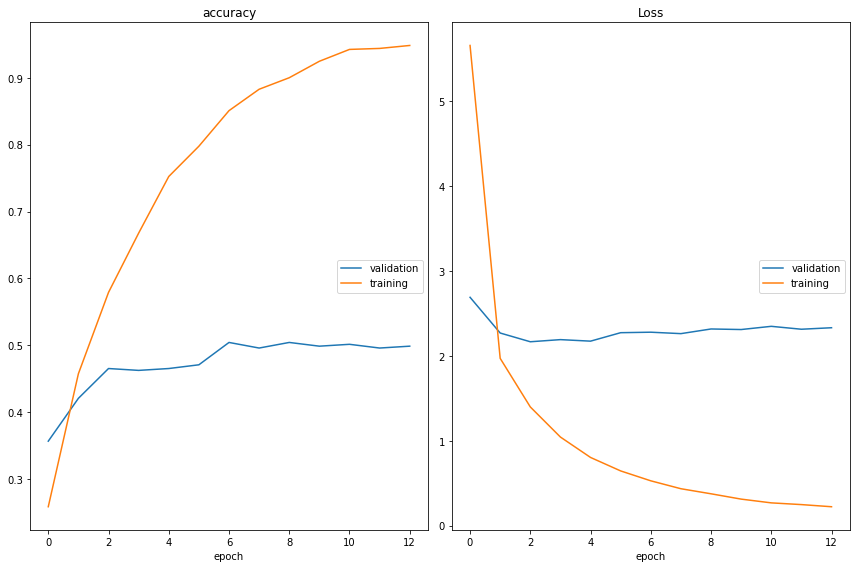

accuracy
	validation       	 (min:    0.357, max:    0.504, cur:    0.499)
	training         	 (min:    0.258, max:    0.948, cur:    0.948)
Loss
	validation       	 (min:    2.165, max:    2.689, cur:    2.330)
	training         	 (min:    0.223, max:    5.654, cur:    0.223)


In [20]:
# vgg16 model used for transfer learning  with 20 epoch


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1, validation_data=(x_val, y_val), 
                        callbacks=[tl_checkpoint_1, early_stop, plot_loss_1])



# entry point, run the test harness
run_test_harness()

In [21]:
from tensorflow.keras.models import load_model

model = load_model('newest model.h5')

# evaluate model
_, acc = model.evaluate(x_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

266/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [22]:
from keras.callbacks import ModelCheckpoint
callbacks = [tf.keras.callbacks.ModelCheckpoint('newest model2.h5', monitor='accuracy', 
                                                save_best_only=True, mode='max')]

In [23]:
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1, validation_data=(x_val, y_val), 
                        callbacks=callbacks)



# entry point, run the test harness
run_test_harness()

Train on 2031 samples, validate on 359 samples
Epoch 1/20
2031/2031 [==============================] - 23s 11ms/step - loss: 6.2467 - accuracy: 0.2629 - val_loss: 2.4685 - val_accuracy: 0.3955
Epoch 2/20
2031/2031 [==============================] - 23s 11ms/step - loss: 2.0864 - accuracy: 0.4594 - val_loss: 2.0040 - val_accuracy: 0.4652
Epoch 3/20
2031/2031 [==============================] - 23s 11ms/step - loss: 1.4284 - accuracy: 0.5771 - val_loss: 1.9642 - val_accuracy: 0.4652
Epoch 4/20
2031/2031 [==============================] - 23s 11ms/step - loss: 1.0311 - accuracy: 0.6745 - val_loss: 1.9430 - val_accuracy: 0.4735
Epoch 5/20
2031/2031 [==============================] - 23s 11ms/step - loss: 0.7973 - accuracy: 0.7597 - val_loss: 1.9283 - val_accuracy: 0.4903
Epoch 6/20
2031/2031 [==============================] - 23s 11ms/step - loss: 0.6326 - accuracy: 0.8144 - val_loss: 1.9261 - val_accuracy: 0.5070
Epoch 7/20
2031/2031 [==============================] - 23s 11ms/step - loss:

In [24]:
from tensorflow.keras.models import load_model

model = load_model('newest model2.h5')

# evaluate model
_, acc = model.evaluate(x_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

266/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [14]:
from keras.callbacks import ModelCheckpoint
callbacks = [tf.keras.callbacks.ModelCheckpoint('newest model5.h5', monitor='accuracy', 
                                                save_best_only=True, mode='max')]

In [15]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(2048, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dense(1024, activation='relu')(class1)
	class1 = Dropout(0.5)(class1)        
	class1 = Dense(512, activation='relu')(class1)   
	class1 = Dense(256, activation='relu')(class1)   
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1, 
                        validation_data=(x_val, y_val), callbacks=callbacks)

# entry point, run the test harness
run_test_harness()

Train on 1805 samples, validate on 452 samples
Epoch 1/100
1805/1805 [==============================] - 34s 19ms/step - loss: 7.0163 - accuracy: 0.1967 - val_loss: 2.2175 - val_accuracy: 0.3982
Epoch 2/100
1805/1805 [==============================] - 26s 14ms/step - loss: 3.2280 - accuracy: 0.2953 - val_loss: 2.1051 - val_accuracy: 0.4226
Epoch 3/100
1805/1805 [==============================] - 26s 14ms/step - loss: 2.5000 - accuracy: 0.3634 - val_loss: 1.9893 - val_accuracy: 0.4469
Epoch 4/100
1805/1805 [==============================] - 26s 14ms/step - loss: 2.1314 - accuracy: 0.4144 - val_loss: 1.8655 - val_accuracy: 0.4558
Epoch 5/100
1805/1805 [==============================] - 26s 14ms/step - loss: 1.9185 - accuracy: 0.4537 - val_loss: 1.8322 - val_accuracy: 0.4934
Epoch 6/100
1805/1805 [==============================] - 26s 14ms/step - loss: 1.8133 - accuracy: 0.4787 - val_loss: 1.8122 - val_accuracy: 0.4624
Epoch 7/100
1805/1805 [==============================] - 26s 14ms/step 

1805/1805 [==============================] - 26s 14ms/step - loss: 0.1544 - accuracy: 0.9579 - val_loss: 1.7757 - val_accuracy: 0.5442
Epoch 57/100
1805/1805 [==============================] - 26s 14ms/step - loss: 0.1524 - accuracy: 0.9562 - val_loss: 1.7776 - val_accuracy: 0.5575
Epoch 58/100
1805/1805 [==============================] - 26s 14ms/step - loss: 0.1463 - accuracy: 0.9557 - val_loss: 1.7481 - val_accuracy: 0.5619
Epoch 59/100
1805/1805 [==============================] - 26s 14ms/step - loss: 0.1419 - accuracy: 0.9573 - val_loss: 1.7489 - val_accuracy: 0.5597
Epoch 60/100
1805/1805 [==============================] - 26s 14ms/step - loss: 0.1265 - accuracy: 0.9695 - val_loss: 1.8158 - val_accuracy: 0.5442
Epoch 61/100
1805/1805 [==============================] - 26s 14ms/step - loss: 0.1212 - accuracy: 0.9629 - val_loss: 1.8324 - val_accuracy: 0.5531
Epoch 62/100
1805/1805 [==============================] - 26s 14ms/step - loss: 0.1233 - accuracy: 0.9612 - val_loss: 1.7582 

In [16]:
from tensorflow.keras.models import load_model

model = load_model('newest model5.h5')

# evaluate model
_, acc = model.evaluate(x_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

399/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

> 55.138


In [17]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(512, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dense(256, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(128, activation='relu')(class1)    
	class1 = Dropout(0.4)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=20, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

Train on 1805 samples, validate on 452 samples
Epoch 1/20
1805/1805 [==============================] - 24s 13ms/step - loss: 5.6717 - accuracy: 0.2216 - val_loss: 2.4738 - val_accuracy: 0.3916
Epoch 2/20
1805/1805 [==============================] - 21s 11ms/step - loss: 2.4392 - accuracy: 0.3994 - val_loss: 2.0462 - val_accuracy: 0.4292
Epoch 3/20
1805/1805 [==============================] - 21s 11ms/step - loss: 1.8739 - accuracy: 0.4848 - val_loss: 1.9318 - val_accuracy: 0.4602
Epoch 4/20
1805/1805 [==============================] - 21s 11ms/step - loss: 1.5860 - accuracy: 0.5313 - val_loss: 1.8710 - val_accuracy: 0.4845
Epoch 5/20
1805/1805 [==============================] - 21s 11ms/step - loss: 1.3590 - accuracy: 0.5767 - val_loss: 1.8364 - val_accuracy: 0.4757
Epoch 6/20
1805/1805 [==============================] - 21s 11ms/step - loss: 1.1574 - accuracy: 0.6443 - val_loss: 1.8759 - val_accuracy: 0.4801
Epoch 7/20
1805/1805 [==============================] - 21s 11ms/step - loss:

In [16]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(1072, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(512, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(256, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(128, activation='relu')(class1)    
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=30, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

Train on 1805 samples, validate on 452 samples
Epoch 1/30
1805/1805 [==============================] - 27s 15ms/step - loss: 8.1074 - accuracy: 0.1751 - val_loss: 2.3003 - val_accuracy: 0.3783
Epoch 2/30
1805/1805 [==============================] - 23s 13ms/step - loss: 3.3074 - accuracy: 0.2831 - val_loss: 2.1019 - val_accuracy: 0.4181
Epoch 3/30
1805/1805 [==============================] - 24s 13ms/step - loss: 2.7389 - accuracy: 0.3380 - val_loss: 1.9932 - val_accuracy: 0.4270
Epoch 4/30
1805/1805 [==============================] - 24s 13ms/step - loss: 2.3468 - accuracy: 0.3828 - val_loss: 1.9404 - val_accuracy: 0.4469
Epoch 5/30
1805/1805 [==============================] - 24s 13ms/step - loss: 2.1206 - accuracy: 0.4244 - val_loss: 1.8814 - val_accuracy: 0.4580
Epoch 6/30
1805/1805 [==============================] - 24s 13ms/step - loss: 2.0167 - accuracy: 0.4532 - val_loss: 1.8601 - val_accuracy: 0.4668
Epoch 7/30
1805/1805 [==============================] - 24s 13ms/step - loss:

In [19]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(1072, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(512, activation='relu')(flat1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(256, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(128, activation='relu')(class1)    
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=30, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

Train on 1805 samples, validate on 452 samples
Epoch 1/30
1805/1805 [==============================] - 24s 13ms/step - loss: 7.3465 - accuracy: 0.1579 - val_loss: 2.5442 - val_accuracy: 0.3164
Epoch 2/30
1805/1805 [==============================] - 24s 13ms/step - loss: 3.1249 - accuracy: 0.2848 - val_loss: 2.1937 - val_accuracy: 0.4115
Epoch 3/30
1805/1805 [==============================] - 24s 13ms/step - loss: 2.5033 - accuracy: 0.3701 - val_loss: 2.0332 - val_accuracy: 0.4403
Epoch 4/30
1805/1805 [==============================] - 24s 13ms/step - loss: 2.1586 - accuracy: 0.3983 - val_loss: 1.9894 - val_accuracy: 0.4469
Epoch 5/30
1805/1805 [==============================] - 24s 13ms/step - loss: 1.9326 - accuracy: 0.4460 - val_loss: 1.9440 - val_accuracy: 0.4624
Epoch 6/30
1805/1805 [==============================] - 24s 13ms/step - loss: 1.8047 - accuracy: 0.4776 - val_loss: 1.9095 - val_accuracy: 0.4469
Epoch 7/30
1805/1805 [==============================] - 24s 13ms/step - loss:

In [12]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(1072, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(512, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(256, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(128, activation='relu')(class1)    
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=50, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

Train on 1805 samples, validate on 452 samples
Epoch 1/50
1805/1805 [==============================] - 28s 16ms/step - loss: 7.4575 - accuracy: 0.1596 - val_loss: 2.4220 - val_accuracy: 0.3385
Epoch 2/50
1805/1805 [==============================] - 21s 11ms/step - loss: 3.3114 - accuracy: 0.2299 - val_loss: 2.2957 - val_accuracy: 0.3562
Epoch 3/50
1805/1805 [==============================] - 21s 12ms/step - loss: 2.7187 - accuracy: 0.3136 - val_loss: 2.1764 - val_accuracy: 0.4071
Epoch 4/50
1805/1805 [==============================] - 21s 12ms/step - loss: 2.4749 - accuracy: 0.3374 - val_loss: 2.0736 - val_accuracy: 0.4403
Epoch 5/50
1805/1805 [==============================] - 21s 12ms/step - loss: 2.3137 - accuracy: 0.3751 - val_loss: 2.0164 - val_accuracy: 0.4358
Epoch 6/50
1805/1805 [==============================] - 21s 12ms/step - loss: 2.1216 - accuracy: 0.4116 - val_loss: 1.9784 - val_accuracy: 0.4336
Epoch 7/50
1805/1805 [==============================] - 21s 12ms/step - loss:

In [14]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(1072, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(512, activation='relu')(flat1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(256, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(128, activation='relu')(class1)    
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=50, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

Train on 1805 samples, validate on 452 samples
Epoch 1/50
1805/1805 [==============================] - 30s 16ms/step - loss: 7.3732 - accuracy: 0.1518 - val_loss: 2.1489 - val_accuracy: 0.3827
Epoch 2/50
1805/1805 [==============================] - 20s 11ms/step - loss: 2.9610 - accuracy: 0.3025 - val_loss: 2.0582 - val_accuracy: 0.4181
Epoch 3/50
1805/1805 [==============================] - 20s 11ms/step - loss: 2.3727 - accuracy: 0.3740 - val_loss: 1.9625 - val_accuracy: 0.4535
Epoch 4/50
1805/1805 [==============================] - 20s 11ms/step - loss: 2.1322 - accuracy: 0.4150 - val_loss: 1.8992 - val_accuracy: 0.4558
Epoch 5/50
1805/1805 [==============================] - 21s 11ms/step - loss: 1.9605 - accuracy: 0.4438 - val_loss: 1.8811 - val_accuracy: 0.4801
Epoch 6/50
1805/1805 [==============================] - 20s 11ms/step - loss: 1.8497 - accuracy: 0.4571 - val_loss: 1.8559 - val_accuracy: 0.4757
Epoch 7/50
1805/1805 [==============================] - 20s 11ms/step - loss:

In [14]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(1024, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(512, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(256, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(128, activation='relu')(class1)    
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

Train on 1805 samples, validate on 452 samples
Epoch 1/100
1805/1805 [==============================] - 21s 12ms/step - loss: 7.4433 - accuracy: 0.1657 - val_loss: 2.3870 - val_accuracy: 0.3097
Epoch 2/100
1805/1805 [==============================] - 21s 12ms/step - loss: 3.3324 - accuracy: 0.2465 - val_loss: 2.1870 - val_accuracy: 0.3429
Epoch 3/100
1805/1805 [==============================] - 21s 12ms/step - loss: 2.6620 - accuracy: 0.2997 - val_loss: 2.0813 - val_accuracy: 0.3650
Epoch 4/100
1805/1805 [==============================] - 21s 12ms/step - loss: 2.4186 - accuracy: 0.3285 - val_loss: 2.0679 - val_accuracy: 0.4049
Epoch 5/100
1805/1805 [==============================] - 21s 12ms/step - loss: 2.2101 - accuracy: 0.3823 - val_loss: 2.0089 - val_accuracy: 0.3695
Epoch 6/100
1805/1805 [==============================] - 21s 12ms/step - loss: 2.0610 - accuracy: 0.4139 - val_loss: 1.9400 - val_accuracy: 0.4181
Epoch 7/100
1805/1805 [==============================] - 21s 12ms/step 

In [14]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(1072, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(512, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(256, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(128, activation='relu')(class1)    
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

Train on 1805 samples, validate on 452 samples
Epoch 1/100
1805/1805 [==============================] - 32s 18ms/step - loss: 6.7415 - accuracy: 0.1507 - val_loss: 2.3487 - val_accuracy: 0.3429
Epoch 2/100
1805/1805 [==============================] - 24s 13ms/step - loss: 3.2124 - accuracy: 0.2410 - val_loss: 2.2056 - val_accuracy: 0.4159
Epoch 3/100
1805/1805 [==============================] - 24s 13ms/step - loss: 2.6332 - accuracy: 0.3158 - val_loss: 2.0956 - val_accuracy: 0.4226
Epoch 4/100
1805/1805 [==============================] - 24s 13ms/step - loss: 2.4810 - accuracy: 0.3612 - val_loss: 1.9969 - val_accuracy: 0.4447
Epoch 5/100
1805/1805 [==============================] - 24s 13ms/step - loss: 2.2080 - accuracy: 0.3939 - val_loss: 1.9629 - val_accuracy: 0.4425
Epoch 6/100
1805/1805 [==============================] - 24s 13ms/step - loss: 2.0639 - accuracy: 0.4227 - val_loss: 1.8835 - val_accuracy: 0.4646
Epoch 7/100
1805/1805 [==============================] - 24s 13ms/step 

1805/1805 [==============================] - 24s 13ms/step - loss: 0.4419 - accuracy: 0.8565 - val_loss: 1.7383 - val_accuracy: 0.5442
Epoch 57/100
1805/1805 [==============================] - 24s 13ms/step - loss: 0.3956 - accuracy: 0.8809 - val_loss: 1.7468 - val_accuracy: 0.5531
Epoch 58/100
1805/1805 [==============================] - 24s 13ms/step - loss: 0.4163 - accuracy: 0.8720 - val_loss: 1.6937 - val_accuracy: 0.5354
Epoch 59/100
1805/1805 [==============================] - 24s 13ms/step - loss: 0.3921 - accuracy: 0.8787 - val_loss: 1.6840 - val_accuracy: 0.5553
Epoch 60/100
1805/1805 [==============================] - 24s 13ms/step - loss: 0.3621 - accuracy: 0.8809 - val_loss: 1.7541 - val_accuracy: 0.5509
Epoch 61/100
1805/1805 [==============================] - 24s 13ms/step - loss: 0.3592 - accuracy: 0.8909 - val_loss: 1.6999 - val_accuracy: 0.5487
Epoch 62/100
1805/1805 [==============================] - 24s 13ms/step - loss: 0.3682 - accuracy: 0.8875 - val_loss: 1.7757 

In [14]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(1072, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dense(512, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(256, activation='relu')(class1)
	class1 = Dense(128, activation='relu')(class1)    
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

Train on 1805 samples, validate on 452 samples
Epoch 1/100
1805/1805 [==============================] - 30s 16ms/step - loss: 5.2578 - accuracy: 0.1856 - val_loss: 2.3754 - val_accuracy: 0.3407
Epoch 2/100
1805/1805 [==============================] - 21s 11ms/step - loss: 2.5648 - accuracy: 0.3169 - val_loss: 2.1594 - val_accuracy: 0.4004
Epoch 3/100
1805/1805 [==============================] - 21s 12ms/step - loss: 2.0765 - accuracy: 0.4205 - val_loss: 1.9855 - val_accuracy: 0.4292
Epoch 4/100
1805/1805 [==============================] - 21s 12ms/step - loss: 1.8437 - accuracy: 0.4759 - val_loss: 1.8717 - val_accuracy: 0.4712
Epoch 5/100
1805/1805 [==============================] - 21s 12ms/step - loss: 1.7210 - accuracy: 0.5014 - val_loss: 1.8469 - val_accuracy: 0.4558
Epoch 6/100
1805/1805 [==============================] - 21s 12ms/step - loss: 1.5445 - accuracy: 0.5562 - val_loss: 1.8036 - val_accuracy: 0.4668
Epoch 7/100
1805/1805 [==============================] - 21s 12ms/step 

In [15]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(1072, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(512, activation='relu')(flat1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(256, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(128, activation='relu')(class1)    
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

Train on 1805 samples, validate on 452 samples
Epoch 1/100
1805/1805 [==============================] - 21s 12ms/step - loss: 7.2074 - accuracy: 0.1889 - val_loss: 2.3616 - val_accuracy: 0.3717
Epoch 2/100
1805/1805 [==============================] - 21s 11ms/step - loss: 3.1826 - accuracy: 0.2814 - val_loss: 2.1976 - val_accuracy: 0.3916
Epoch 3/100
1805/1805 [==============================] - 21s 12ms/step - loss: 2.4598 - accuracy: 0.3662 - val_loss: 2.0635 - val_accuracy: 0.4403
Epoch 4/100
1805/1805 [==============================] - 21s 11ms/step - loss: 2.2375 - accuracy: 0.4127 - val_loss: 1.9668 - val_accuracy: 0.4624
Epoch 5/100
1805/1805 [==============================] - 21s 11ms/step - loss: 1.9623 - accuracy: 0.4532 - val_loss: 1.8980 - val_accuracy: 0.4602
Epoch 6/100
1805/1805 [==============================] - 21s 11ms/step - loss: 1.8470 - accuracy: 0.4803 - val_loss: 1.9042 - val_accuracy: 0.4735
Epoch 7/100
1805/1805 [==============================] - 21s 11ms/step 

In [13]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(2048, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(1024, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)        
	class1 = Dense(512, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(256, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(128, activation='relu')(class1)    
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

Train on 1805 samples, validate on 452 samples
Epoch 1/100
1805/1805 [==============================] - 30s 17ms/step - loss: 7.0344 - accuracy: 0.1391 - val_loss: 2.3156 - val_accuracy: 0.3429
Epoch 2/100
1805/1805 [==============================] - 22s 12ms/step - loss: 3.2548 - accuracy: 0.2310 - val_loss: 2.2940 - val_accuracy: 0.3341
Epoch 3/100
1805/1805 [==============================] - 23s 12ms/step - loss: 2.8220 - accuracy: 0.2515 - val_loss: 2.2742 - val_accuracy: 0.3850
Epoch 4/100
1805/1805 [==============================] - 23s 12ms/step - loss: 2.5864 - accuracy: 0.3069 - val_loss: 2.1330 - val_accuracy: 0.4004
Epoch 5/100
1805/1805 [==============================] - 23s 13ms/step - loss: 2.4038 - accuracy: 0.3391 - val_loss: 2.0948 - val_accuracy: 0.4159
Epoch 6/100
1805/1805 [==============================] - 23s 12ms/step - loss: 2.2340 - accuracy: 0.3723 - val_loss: 2.0304 - val_accuracy: 0.4270
Epoch 7/100
1805/1805 [==============================] - 23s 13ms/step 

In [15]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(2048, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dense(1024, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)        
	class1 = Dense(512, activation='relu')(class1)   
	class1 = Dense(256, activation='relu')(class1)   
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

Train on 1805 samples, validate on 452 samples
Epoch 1/100
1805/1805 [==============================] - 24s 13ms/step - loss: 6.1925 - accuracy: 0.2172 - val_loss: 2.2873 - val_accuracy: 0.3739
Epoch 2/100
1805/1805 [==============================] - 24s 13ms/step - loss: 2.4739 - accuracy: 0.3873 - val_loss: 2.0661 - val_accuracy: 0.4314
Epoch 3/100
1805/1805 [==============================] - 24s 13ms/step - loss: 1.9088 - accuracy: 0.4615 - val_loss: 1.9328 - val_accuracy: 0.4580
Epoch 4/100
1805/1805 [==============================] - 24s 13ms/step - loss: 1.6624 - accuracy: 0.5263 - val_loss: 1.8849 - val_accuracy: 0.4535
Epoch 5/100
1805/1805 [==============================] - 24s 13ms/step - loss: 1.4295 - accuracy: 0.5795 - val_loss: 1.8193 - val_accuracy: 0.4867
Epoch 6/100
1805/1805 [==============================] - 24s 13ms/step - loss: 1.2320 - accuracy: 0.6305 - val_loss: 1.7959 - val_accuracy: 0.4867
Epoch 7/100
1805/1805 [==============================] - 24s 13ms/step 

In [13]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(2048, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dense(1024, activation='relu')(class1)
	class1 = Dropout(0.5)(class1)        
	class1 = Dense(512, activation='relu')(class1)   
	class1 = Dense(256, activation='relu')(class1)   
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

Train on 1805 samples, validate on 452 samples
Epoch 1/100
1805/1805 [==============================] - 30s 17ms/step - loss: 7.8197 - accuracy: 0.1895 - val_loss: 2.2745 - val_accuracy: 0.3673
Epoch 2/100
1805/1805 [==============================] - 22s 12ms/step - loss: 3.0071 - accuracy: 0.3219 - val_loss: 2.1334 - val_accuracy: 0.4336
Epoch 3/100
1805/1805 [==============================] - 22s 12ms/step - loss: 2.4713 - accuracy: 0.3634 - val_loss: 2.0513 - val_accuracy: 0.4358
Epoch 4/100
1805/1805 [==============================] - 22s 12ms/step - loss: 2.1715 - accuracy: 0.4083 - val_loss: 1.9742 - val_accuracy: 0.4425
Epoch 5/100
1805/1805 [==============================] - 23s 13ms/step - loss: 1.9824 - accuracy: 0.4460 - val_loss: 1.9017 - val_accuracy: 0.4735
Epoch 6/100
1805/1805 [==============================] - 22s 12ms/step - loss: 1.8629 - accuracy: 0.4731 - val_loss: 1.8661 - val_accuracy: 0.4823
Epoch 7/100
1805/1805 [==============================] - 22s 12ms/step 

In [13]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(2048, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dropout(0.3)(class1)
	class1 = Dense(1024, activation='relu')(class1)
	class1 = Dropout(0.3)(class1)        
	class1 = Dense(512, activation='relu')(class1)
	class1 = Dropout(0.3)(class1)    
	class1 = Dense(256, activation='relu')(class1)
	class1 = Dropout(0.3)(class1)
	class1 = Dense(128, activation='relu')(class1)    
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

Train on 1805 samples, validate on 452 samples
Epoch 1/100
1805/1805 [==============================] - 29s 16ms/step - loss: 8.9684 - accuracy: 0.1413 - val_loss: 2.4853 - val_accuracy: 0.2854
Epoch 2/100
1805/1805 [==============================] - 22s 12ms/step - loss: 3.9361 - accuracy: 0.1906 - val_loss: 2.6068 - val_accuracy: 0.3119
Epoch 3/100
1805/1805 [==============================] - 22s 12ms/step - loss: 3.2799 - accuracy: 0.2044 - val_loss: 2.5169 - val_accuracy: 0.3739
Epoch 4/100
1805/1805 [==============================] - 22s 12ms/step - loss: 2.9853 - accuracy: 0.2238 - val_loss: 2.5110 - val_accuracy: 0.3739
Epoch 5/100
1805/1805 [==============================] - 22s 12ms/step - loss: 2.8223 - accuracy: 0.2560 - val_loss: 2.5052 - val_accuracy: 0.3761
Epoch 6/100
1805/1805 [==============================] - 22s 12ms/step - loss: 2.6255 - accuracy: 0.2670 - val_loss: 2.4671 - val_accuracy: 0.3960
Epoch 7/100
1805/1805 [==============================] - 22s 12ms/step 

In [14]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(4096, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(2048, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)      
	class1 = Dense(1072, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(512, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(256, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(128, activation='relu')(class1)    
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=8, epochs=50, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

ResourceExhaustedError: OOM when allocating tensor with shape[32768,4096] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Mul] name: dense_8/random_uniform/mul/

In [16]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(4096, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(1072, activation='relu')(flat1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(512, activation='relu')(flat1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(256, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(128, activation='relu')(class1)    
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=50, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

Train on 1805 samples, validate on 452 samples
Epoch 1/50
1805/1805 [==============================] - 25s 14ms/step - loss: 7.6154 - accuracy: 0.1762 - val_loss: 2.3848 - val_accuracy: 0.3805
Epoch 2/50
1805/1805 [==============================] - 25s 14ms/step - loss: 3.1425 - accuracy: 0.3152 - val_loss: 2.1237 - val_accuracy: 0.4270
Epoch 3/50
1805/1805 [==============================] - 26s 14ms/step - loss: 2.4928 - accuracy: 0.3668 - val_loss: 2.0146 - val_accuracy: 0.4358
Epoch 4/50
1805/1805 [==============================] - 26s 14ms/step - loss: 2.2040 - accuracy: 0.4216 - val_loss: 1.9546 - val_accuracy: 0.4336
Epoch 5/50
1805/1805 [==============================] - 26s 14ms/step - loss: 2.0961 - accuracy: 0.4393 - val_loss: 1.9328 - val_accuracy: 0.4425
Epoch 6/50
1805/1805 [==============================] - 26s 14ms/step - loss: 1.8214 - accuracy: 0.4892 - val_loss: 1.8956 - val_accuracy: 0.4381
Epoch 7/50
1805/1805 [==============================] - 26s 14ms/step - loss:

In [ ]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(4096, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(1072, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(512, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(256, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(128, activation='relu')(class1)    
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

In [ ]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(4096, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(1024, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(512, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(256, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(128, activation='relu')(class1)    
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

In [ ]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(4096, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(1072, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(512, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(256, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(128, activation='relu')(class1)    
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

In [14]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(4096, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(1072, activation='relu')(flat1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(512, activation='relu')(flat1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(256, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(128, activation='relu')(class1)    
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

Train on 1805 samples, validate on 452 samples
Epoch 1/100
1805/1805 [==============================] - 29s 16ms/step - loss: 7.3409 - accuracy: 0.2150 - val_loss: 2.2158 - val_accuracy: 0.4093
Epoch 2/100
1805/1805 [==============================] - 21s 12ms/step - loss: 3.0761 - accuracy: 0.3197 - val_loss: 2.0474 - val_accuracy: 0.4248
Epoch 3/100
1805/1805 [==============================] - 21s 12ms/step - loss: 2.5521 - accuracy: 0.3717 - val_loss: 1.9911 - val_accuracy: 0.4469
Epoch 4/100
1805/1805 [==============================] - 21s 12ms/step - loss: 2.1569 - accuracy: 0.4294 - val_loss: 1.9169 - val_accuracy: 0.4491
Epoch 5/100
1805/1805 [==============================] - 22s 12ms/step - loss: 1.9505 - accuracy: 0.4609 - val_loss: 1.9207 - val_accuracy: 0.4491
Epoch 6/100
1805/1805 [==============================] - 22s 12ms/step - loss: 1.8212 - accuracy: 0.4781 - val_loss: 1.8538 - val_accuracy: 0.4624
Epoch 7/100
1805/1805 [==============================] - 22s 12ms/step 

In [ ]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(4096, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(1072, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(512, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(256, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(128, activation='relu')(class1)    
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

In [1]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(4096, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(1072, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(512, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(256, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(128, activation='relu')(class1)    
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

Using TensorFlow backend.


NameError: name 'Dropout' is not defined

In [2]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(4096, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(2048, activation='relu')(flat1)
	class1 = Dropout(0.2)(class1) 
	class1 = Dense(1024, activation='relu')(flat1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(512, activation='relu')(flat1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(256, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(128, activation='relu')(class1)    
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=50, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

NameError: name 'Dropout' is not defined

In [ ]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(4096, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dropout(0.4)(class1)
	class1 = Dense(2048, activation='relu')(flat1)
	class1 = Dropout(0.4)(class1) 
	class1 = Dense(1024, activation='relu')(flat1)
	class1 = Dropout(0.4)(class1)    
	class1 = Dense(512, activation='relu')(flat1)
	class1 = Dropout(0.4)(class1)    
	class1 = Dense(256, activation='relu')(class1)
	class1 = Dropout(0.4)(class1)
	class1 = Dense(128, activation='relu')(class1)    
	class1 = Dropout(0.6)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=50, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

In [14]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(4096, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dropout(0.3)(class1)
	class1 = Dense(2048, activation='relu')(flat1)
	class1 = Dropout(0.3)(class1) 
	class1 = Dense(1024, activation='relu')(flat1)
	class1 = Dropout(0.3)(class1)    
	class1 = Dense(512, activation='relu')(flat1)
	class1 = Dropout(0.3)(class1)    
	class1 = Dense(256, activation='relu')(class1)
	class1 = Dropout(0.3)(class1)
	class1 = Dense(128, activation='relu')(class1)    
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=50, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

Train on 1805 samples, validate on 452 samples
Epoch 1/50
1805/1805 [==============================] - 29s 16ms/step - loss: 8.9570 - accuracy: 0.1579 - val_loss: 2.3055 - val_accuracy: 0.3540
Epoch 2/50
1805/1805 [==============================] - 22s 12ms/step - loss: 3.4083 - accuracy: 0.2681 - val_loss: 2.1071 - val_accuracy: 0.4204
Epoch 3/50
1805/1805 [==============================] - 22s 12ms/step - loss: 2.6460 - accuracy: 0.3053 - val_loss: 2.0661 - val_accuracy: 0.4159
Epoch 4/50
1805/1805 [==============================] - 22s 12ms/step - loss: 2.3651 - accuracy: 0.3518 - val_loss: 2.0081 - val_accuracy: 0.4292
Epoch 5/50
1805/1805 [==============================] - 22s 12ms/step - loss: 2.1442 - accuracy: 0.4044 - val_loss: 1.9943 - val_accuracy: 0.4469
Epoch 6/50
1805/1805 [==============================] - 22s 12ms/step - loss: 2.0126 - accuracy: 0.4255 - val_loss: 1.9169 - val_accuracy: 0.4403
Epoch 7/50
1805/1805 [==============================] - 22s 12ms/step - loss:

In [ ]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(4096, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(1024, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(512, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(256, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(128, activation='relu')(class1)    
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

In [ ]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(4096, activation='relu', kernel_initializer='he_uniform')(flat1)
	class1 = Dropout(0.2)(class1)
	class1 = Dense(2048, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(1024, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(512, activation='relu')(class1)
	class1 = Dropout(0.2)(class1)    
	class1 = Dense(256, activation='relu')(class1)   
	class1 = Dropout(0.5)(class1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1, 
                        validation_data=(x_val, y_val))
	# evaluate model
	_, acc = model.evaluate(x_test, y_test, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('new vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

In [9]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, epochs=10, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train, y_train, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('vgg16 fd1 10 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/10
2656/2656 [==============================] - 41s 16ms/step - loss: 3.7155 - accuracy: 0.3366
Epoch 2/10
2656/2656 [==============================] - 28s 11ms/step - loss: 1.6419 - accuracy: 0.4959
Epoch 3/10
2656/2656 [==============================] - 26s 10ms/step - loss: 1.3569 - accuracy: 0.5550
Epoch 4/10
2656/2656 [==============================] - 28s 10ms/step - loss: 1.1396 - accuracy: 0.6088
Epoch 5/10
2656/2656 [==============================] - 26s 10ms/step - loss: 0.9827 - accuracy: 0.6608
Epoch 6/10
2656/2656 [==============================] - 26s 10ms/step - loss: 0.8530 - accuracy: 0.7052
Epoch 7/10
2656/2656 [==============================] - 26s 10ms/step - loss: 0.7198 - accuracy: 0.7489
Epoch 8/10
2656/2656 [==============================] - 26s 10ms/step - loss: 0.6124 - accuracy: 0.7929
Epoch 9/10
2656/2656 [==============================] - 26s 10ms/step - loss: 0.5135 - accuracy: 0.8249
Epoch 10/10
2656/2656 [==============================] - 26s 10m

In [10]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, epochs=15, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train, y_train, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg16 fd1 15 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/15
2656/2656 [==============================] - 28s 10ms/step - loss: 3.7578 - accuracy: 0.3396
Epoch 2/15
2656/2656 [==============================] - 25s 10ms/step - loss: 1.6280 - accuracy: 0.4992
Epoch 3/15
2656/2656 [==============================] - 26s 10ms/step - loss: 1.3502 - accuracy: 0.5651
Epoch 4/15
2656/2656 [==============================] - 26s 10ms/step - loss: 1.1575 - accuracy: 0.6227
Epoch 5/15
2656/2656 [==============================] - 26s 10ms/step - loss: 0.9791 - accuracy: 0.6724
Epoch 6/15
2656/2656 [==============================] - 26s 10ms/step - loss: 0.8363 - accuracy: 0.7169
Epoch 7/15
2656/2656 [==============================] - 26s 10ms/step - loss: 0.7327 - accuracy: 0.7568
Epoch 8/15
2656/2656 [==============================] - 26s 10ms/step - loss: 0.6121 - accuracy: 0.7986
Epoch 9/15
2656/2656 [==============================] - 26s 10ms/step - loss: 0.5224 - accuracy: 0.8302
Epoch 10/15
2656/2656 [==============================] - 27s 10m

In [12]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, epochs=20, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train, y_train, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/20
2656/2656 [==============================] - 30s 11ms/step - loss: 3.3801 - accuracy: 0.3573
Epoch 2/20
2656/2656 [==============================] - 32s 12ms/step - loss: 1.6089 - accuracy: 0.5019
Epoch 3/20
2656/2656 [==============================] - 27s 10ms/step - loss: 1.3637 - accuracy: 0.5587
Epoch 4/20
2656/2656 [==============================] - 26s 10ms/step - loss: 1.1732 - accuracy: 0.6111
Epoch 5/20
2656/2656 [==============================] - 27s 10ms/step - loss: 1.0117 - accuracy: 0.6596
Epoch 6/20
2656/2656 [==============================] - 28s 11ms/step - loss: 0.8602 - accuracy: 0.7142
Epoch 7/20
2656/2656 [==============================] - 26s 10ms/step - loss: 0.7262 - accuracy: 0.7500
Epoch 8/20
2656/2656 [==============================] - 28s 10ms/step - loss: 0.6045 - accuracy: 0.7929
Epoch 9/20
2656/2656 [==============================] - 26s 10ms/step - loss: 0.5103 - accuracy: 0.8264
Epoch 10/20
2656/2656 [==============================] - 30s 11m

In [13]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0009, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, epochs=20, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train, y_train, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/20
2656/2656 [==============================] - 35s 13ms/step - loss: 9.2221 - accuracy: 0.2590
Epoch 2/20
2656/2656 [==============================] - 31s 11ms/step - loss: 2.0833 - accuracy: 0.3603
Epoch 3/20
2656/2656 [==============================] - 32s 12ms/step - loss: 1.7440 - accuracy: 0.4612
Epoch 4/20
2656/2656 [==============================] - 30s 11ms/step - loss: 1.6310 - accuracy: 0.4797
Epoch 5/20
2656/2656 [==============================] - 35s 13ms/step - loss: 1.5747 - accuracy: 0.4895
Epoch 6/20
2656/2656 [==============================] - 32s 12ms/step - loss: 1.5489 - accuracy: 0.5008
Epoch 7/20
2656/2656 [==============================] - 30s 11ms/step - loss: 1.5230 - accuracy: 0.5309
Epoch 8/20
2656/2656 [==============================] - 29s 11ms/step - loss: 1.5024 - accuracy: 0.5410
Epoch 9/20
2656/2656 [==============================] - 30s 11ms/step - loss: 1.4719 - accuracy: 0.5463
Epoch 10/20
2656/2656 [==============================] - 35s 13m

In [14]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0008, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, epochs=30, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train, y_train, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/30
2656/2656 [==============================] - 31s 12ms/step - loss: 6.3151 - accuracy: 0.2824
Epoch 2/30
2656/2656 [==============================] - 30s 11ms/step - loss: 1.9309 - accuracy: 0.4213
Epoch 3/30
2656/2656 [==============================] - 34s 13ms/step - loss: 1.7196 - accuracy: 0.4699
Epoch 4/30
2656/2656 [==============================] - 33s 12ms/step - loss: 1.6308 - accuracy: 0.4785
Epoch 5/30
2656/2656 [==============================] - 32s 12ms/step - loss: 1.5807 - accuracy: 0.4868
Epoch 6/30
2656/2656 [==============================] - 30s 11ms/step - loss: 1.5615 - accuracy: 0.5041
Epoch 7/30
2656/2656 [==============================] - 30s 11ms/step - loss: 1.5337 - accuracy: 0.5192
Epoch 8/30
2656/2656 [==============================] - 34s 13ms/step - loss: 1.5113 - accuracy: 0.5286
Epoch 9/30
2656/2656 [==============================] - 28s 11ms/step - loss: 1.4965 - accuracy: 0.5320
Epoch 10/30
2656/2656 [==============================] - 29s 11m

In [15]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0005, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, epochs=20, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train, y_train, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/20
2656/2656 [==============================] - 32s 12ms/step - loss: 5.5218 - accuracy: 0.2730
Epoch 2/20
2656/2656 [==============================] - 32s 12ms/step - loss: 2.0058 - accuracy: 0.2959
Epoch 3/20
2656/2656 [==============================] - 33s 12ms/step - loss: 1.8865 - accuracy: 0.3694
Epoch 4/20
2656/2656 [==============================] - 38s 14ms/step - loss: 1.7489 - accuracy: 0.4639
Epoch 5/20
2656/2656 [==============================] - 35s 13ms/step - loss: 1.6137 - accuracy: 0.5222
Epoch 6/20
2656/2656 [==============================] - 34s 13ms/step - loss: 1.5194 - accuracy: 0.5422
Epoch 7/20
2656/2656 [==============================] - 34s 13ms/step - loss: 1.4477 - accuracy: 0.5700
Epoch 8/20
2656/2656 [==============================] - 34s 13ms/step - loss: 1.3639 - accuracy: 0.5881
Epoch 9/20
2656/2656 [==============================] - 35s 13ms/step - loss: 1.2852 - accuracy: 0.6009
Epoch 10/20
2656/2656 [==============================] - 34s 13m

In [16]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0005, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, epochs=50, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train, y_train, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('vgg16 fd1 20 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/50
2656/2656 [==============================] - 32s 12ms/step - loss: 4.9003 - accuracy: 0.3065
Epoch 2/50
2656/2656 [==============================] - 32s 12ms/step - loss: 1.8126 - accuracy: 0.4428
Epoch 3/50
2656/2656 [==============================] - 28s 10ms/step - loss: 1.6622 - accuracy: 0.4861
Epoch 4/50
2656/2656 [==============================] - 29s 11ms/step - loss: 1.5897 - accuracy: 0.5192
Epoch 5/50
2656/2656 [==============================] - 29s 11ms/step - loss: 1.5375 - accuracy: 0.5264
Epoch 6/50
2656/2656 [==============================] - 32s 12ms/step - loss: 1.5048 - accuracy: 0.5335
Epoch 7/50
2656/2656 [==============================] - 27s 10ms/step - loss: 1.4466 - accuracy: 0.5497
Epoch 8/50
2656/2656 [==============================] - 29s 11ms/step - loss: 1.4183 - accuracy: 0.5580
Epoch 9/50
2656/2656 [==============================] - 28s 11ms/step - loss: 1.3740 - accuracy: 0.5678
Epoch 10/50
2656/2656 [==============================] - 29s 11m

In [9]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0005, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, epochs=150, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train, y_train, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg16 fd1 150 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/150
2656/2656 [==============================] - 37s 14ms/step - loss: 3.0696 - accuracy: 0.3705
Epoch 2/150
2656/2656 [==============================] - 25s 10ms/step - loss: 1.8724 - accuracy: 0.4469
Epoch 3/150
2656/2656 [==============================] - 27s 10ms/step - loss: 1.5933 - accuracy: 0.5015
Epoch 4/150
2656/2656 [==============================] - 25s 10ms/step - loss: 1.5131 - accuracy: 0.5282
Epoch 5/150
2656/2656 [==============================] - 25s 10ms/step - loss: 1.4655 - accuracy: 0.5459
Epoch 6/150
2656/2656 [==============================] - 25s 10ms/step - loss: 1.4150 - accuracy: 0.5584
Epoch 7/150
2656/2656 [==============================] - 25s 10ms/step - loss: 1.3787 - accuracy: 0.5651
Epoch 8/150
2656/2656 [==============================] - 26s 10ms/step - loss: 1.3227 - accuracy: 0.5791
Epoch 9/150
2656/2656 [==============================] - 26s 10ms/step - loss: 1.2647 - accuracy: 0.5945
Epoch 10/150
2656/2656 [==============================]

In [10]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(256, 256))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 256, 256, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample_image0.jpg')
	# load model
	model = load_model('vgg16 fd1 150 epoch.h5')
	# predict the class
	result = model.predict(img)
	print(result[0])

# entry point, run the example
run_example()

[1.1716362e-09 4.0048058e-03 3.2865743e-09 9.9257058e-01 3.2242565e-04
 3.4610061e-06 1.0153035e-06 5.4095917e-08 1.6381325e-07 3.3786517e-05
 9.2687039e-04 2.8542274e-07 5.0231125e-07 6.2590000e-09 1.6551279e-11
 1.6553949e-09 1.2841139e-12 2.1359960e-03 7.5284589e-08]


In [ ]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0005, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, epochs=200, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train, y_train, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg16 fd1 200 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/200
2656/2656 [==============================] - 32s 12ms/step - loss: 4.1032 - accuracy: 0.3230
Epoch 2/200
2656/2656 [==============================] - 33s 12ms/step - loss: 1.7167 - accuracy: 0.4789
Epoch 3/200
2656/2656 [==============================] - 33s 12ms/step - loss: 1.5836 - accuracy: 0.5034
Epoch 4/200
2656/2656 [==============================] - 30s 11ms/step - loss: 1.5206 - accuracy: 0.5117
Epoch 5/200
2656/2656 [==============================] - 33s 12ms/step - loss: 1.4826 - accuracy: 0.5237
Epoch 6/200
2656/2656 [==============================] - 35s 13ms/step - loss: 1.4353 - accuracy: 0.5301
Epoch 7/200
2656/2656 [==============================] - 34s 13ms/step - loss: 1.3949 - accuracy: 0.5497
Epoch 8/200
2656/2656 [==============================] - 34s 13ms/step - loss: 1.3462 - accuracy: 0.5715
Epoch 9/200
2656/2656 [==============================] - 37s 14ms/step - loss: 1.3139 - accuracy: 0.5798
Epoch 10/200
2656/2656 [==============================]

# VGG-19

In [17]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, epochs=10, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train, y_train, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg19 fd1 10 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/10
2656/2656 [==============================] - 41s 15ms/step - loss: 3.9782 - accuracy: 0.3309
Epoch 2/10
2656/2656 [==============================] - 30s 11ms/step - loss: 1.5864 - accuracy: 0.5132
Epoch 3/10
2656/2656 [==============================] - 30s 11ms/step - loss: 1.2283 - accuracy: 0.6017
Epoch 4/10
2656/2656 [==============================] - 30s 11ms/step - loss: 0.9475 - accuracy: 0.6886
Epoch 5/10
2656/2656 [==============================] - 31s 12ms/step - loss: 0.7162 - accuracy: 0.7553
Epoch 6/10
2656/2656 [==============================] - 30s 11ms/step - loss: 0.5388 - accuracy: 0.8257
Epoch 7/10
2656/2656 [==============================] - 30s 11ms/step - loss: 0.4013 - accuracy: 0.8773
Epoch 8/10
2656/2656 [==============================] - 30s 11ms/step - loss: 0.2975 - accuracy: 0.9213
Epoch 9/10
2656/2656 [==============================] - 30s 11ms/step - loss: 0.2145 - accuracy: 0.9514
Epoch 10/10
2656/2656 [==============================] - 30s 11m

In [ ]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, epochs=15, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train, y_train, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg19 fd1 15 epoch.h5')


# entry point, run the test harness
run_test_harness()

In [11]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0005, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, epochs=100, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train, y_train, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg19 fd1 100 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/100
2656/2656 [==============================] - 37s 14ms/step - loss: 3.9007 - accuracy: 0.3505
Epoch 2/100
2656/2656 [==============================] - 35s 13ms/step - loss: 1.7424 - accuracy: 0.4586
Epoch 3/100
2656/2656 [==============================] - 36s 13ms/step - loss: 1.5833 - accuracy: 0.5132
Epoch 4/100
2656/2656 [==============================] - 34s 13ms/step - loss: 1.4881 - accuracy: 0.5279
Epoch 5/100
2656/2656 [==============================] - 33s 12ms/step - loss: 1.4288 - accuracy: 0.5392
Epoch 6/100
2656/2656 [==============================] - 36s 14ms/step - loss: 1.3594 - accuracy: 0.5595
Epoch 7/100
2656/2656 [==============================] - 34s 13ms/step - loss: 1.2965 - accuracy: 0.5753
Epoch 8/100
2656/2656 [==============================] - 31s 12ms/step - loss: 1.2385 - accuracy: 0.6073
Epoch 9/100
2656/2656 [==============================] - 30s 11ms/step - loss: 1.1777 - accuracy: 0.6280
Epoch 10/100
2656/2656 [==============================]

In [12]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0005, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, epochs=150, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train, y_train, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg19 fd1 150 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/150
2656/2656 [==============================] - 36s 14ms/step - loss: 3.4433 - accuracy: 0.3419
Epoch 2/150
2656/2656 [==============================] - 36s 14ms/step - loss: 1.6533 - accuracy: 0.4925
Epoch 3/150
2656/2656 [==============================] - 33s 12ms/step - loss: 1.5052 - accuracy: 0.5425
Epoch 4/150
2656/2656 [==============================] - 37s 14ms/step - loss: 1.3832 - accuracy: 0.5636
Epoch 5/150
2656/2656 [==============================] - 33s 13ms/step - loss: 1.2868 - accuracy: 0.5840
Epoch 6/150
2656/2656 [==============================] - 34s 13ms/step - loss: 1.1742 - accuracy: 0.6084
Epoch 7/150
2656/2656 [==============================] - 33s 12ms/step - loss: 1.0881 - accuracy: 0.6393
Epoch 8/150
2656/2656 [==============================] - 33s 13ms/step - loss: 1.0170 - accuracy: 0.6596
Epoch 9/150
2656/2656 [==============================] - 30s 11ms/step - loss: 0.9553 - accuracy: 0.6785
Epoch 10/150
2656/2656 [==============================]

### fold 2

In [9]:
x_train_2 = np.load('pannuke\\Fold_2\\images\\images.npy')

In [10]:
y_train_2 = np.load('pannuke\\Fold_2\\images\\types.npy')

In [11]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# integer encode
label_encoder = LabelEncoder()
integer_encoded2 = label_encoder.fit_transform(y_train_2)
print(integer_encoded2)

print(y_train_2)
# binary encode
onehot_encoder2 = OneHotEncoder(sparse=False)
integer_encoded2 = integer_encoded2.reshape(len(integer_encoded2), 1)
onehot_encoded2 = onehot_encoder.fit_transform(integer_encoded2)
print(onehot_encoded2)

y_train_2 = onehot_encoded2

[3 3 3 ... 5 5 5]
['Breast' 'Breast' 'Breast' ... 'Colon' 'Colon' 'Colon']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# VGG-16

In [15]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train_2, y_train_2, epochs=10, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train_2, y_train_2, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	#model.save('vgg16 fd2 10 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/10
2523/2523 [==============================] - 24s 10ms/step - loss: 3.6820 - accuracy: 0.3314
Epoch 2/10
2523/2523 [==============================] - 25s 10ms/step - loss: 1.6633 - accuracy: 0.4962
Epoch 3/10
2523/2523 [==============================] - 24s 10ms/step - loss: 1.3367 - accuracy: 0.5826
Epoch 4/10
2523/2523 [==============================] - 24s 10ms/step - loss: 1.1042 - accuracy: 0.6322
Epoch 5/10
2523/2523 [==============================] - 25s 10ms/step - loss: 0.9413 - accuracy: 0.6857
Epoch 6/10
2523/2523 [==============================] - 25s 10ms/step - loss: 0.7972 - accuracy: 0.7352
Epoch 7/10
2523/2523 [==============================] - 25s 10ms/step - loss: 0.6680 - accuracy: 0.7780
Epoch 8/10
2523/2523 [==============================] - 26s 10ms/step - loss: 0.5597 - accuracy: 0.8161
Epoch 9/10
2523/2523 [==============================] - 26s 10ms/step - loss: 0.4723 - accuracy: 0.8462
Epoch 10/10
2523/2523 [==============================] - 31s 12m

In [14]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train_2, y_train_2, epochs=15, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train_2, y_train_2, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg16 fd2 15 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/15
2523/2523 [==============================] - 28s 11ms/step - loss: 3.5589 - accuracy: 0.3500
Epoch 2/15
2523/2523 [==============================] - 25s 10ms/step - loss: 1.5997 - accuracy: 0.4946
Epoch 3/15
2523/2523 [==============================] - 25s 10ms/step - loss: 1.3473 - accuracy: 0.5640
Epoch 4/15
2523/2523 [==============================] - 25s 10ms/step - loss: 1.1311 - accuracy: 0.6274
Epoch 5/15
2523/2523 [==============================] - 25s 10ms/step - loss: 0.9390 - accuracy: 0.6952
Epoch 6/15
2523/2523 [==============================] - 25s 10ms/step - loss: 0.7921 - accuracy: 0.7368
Epoch 7/15
2523/2523 [==============================] - 25s 10ms/step - loss: 0.6547 - accuracy: 0.7852
Epoch 8/15
2523/2523 [==============================] - 25s 10ms/step - loss: 0.5436 - accuracy: 0.8224
Epoch 9/15
2523/2523 [==============================] - 25s 10ms/step - loss: 0.4396 - accuracy: 0.8569
Epoch 10/15
2523/2523 [==============================] - 25s 10m

In [12]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, epochs=15, verbose=1)
	# save model
	model.save('vgg16 fd1 15 epoch for testing.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/15
2656/2656 [==============================] - 47s 18ms/step - loss: 3.5538 - accuracy: 0.3645
Epoch 2/15
2656/2656 [==============================] - 35s 13ms/step - loss: 1.5942 - accuracy: 0.5056
Epoch 3/15
2656/2656 [==============================] - 35s 13ms/step - loss: 1.3479 - accuracy: 0.5614
Epoch 4/15
2656/2656 [==============================] - 33s 12ms/step - loss: 1.1578 - accuracy: 0.6171
Epoch 5/15
2656/2656 [==============================] - 32s 12ms/step - loss: 1.0076 - accuracy: 0.6532
Epoch 6/15
2656/2656 [==============================] - 31s 12ms/step - loss: 0.8900 - accuracy: 0.6928
Epoch 7/15
2656/2656 [==============================] - 31s 12ms/step - loss: 0.7704 - accuracy: 0.7334
Epoch 8/15
2656/2656 [==============================] - 34s 13ms/step - loss: 0.6702 - accuracy: 0.7696
Epoch 9/15
2656/2656 [==============================] - 29s 11ms/step - loss: 0.5710 - accuracy: 0.8087
Epoch 10/15
2656/2656 [==============================] - 33s 13m

In [13]:
from tensorflow.keras.models import load_model

model = load_model('vgg16 fd1 15 epoch for testing.h5')

# evaluate model
_, acc = model.evaluate(x_train_2, y_train_2, verbose=1)
print('> %.3f' % (acc * 100.0))

2523/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

> 50.575


In [16]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0005, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train_2, y_train_2, epochs=150, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train_2, y_train_2, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg16 fd2 150 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/150
2523/2523 [==============================] - 31s 12ms/step - loss: 4.8436 - accuracy: 0.3004
Epoch 2/150
2523/2523 [==============================] - 27s 11ms/step - loss: 1.7148 - accuracy: 0.4689
Epoch 3/150
2523/2523 [==============================] - 25s 10ms/step - loss: 1.5579 - accuracy: 0.5113
Epoch 4/150
2523/2523 [==============================] - 25s 10ms/step - loss: 1.4761 - accuracy: 0.5529
Epoch 5/150
2523/2523 [==============================] - 25s 10ms/step - loss: 1.4328 - accuracy: 0.5660
Epoch 6/150
2523/2523 [==============================] - 25s 10ms/step - loss: 1.3769 - accuracy: 0.5779
Epoch 7/150
2523/2523 [==============================] - 25s 10ms/step - loss: 1.3232 - accuracy: 0.5870
Epoch 8/150
2523/2523 [==============================] - 25s 10ms/step - loss: 1.2656 - accuracy: 0.5953
Epoch 9/150
2523/2523 [==============================] - 25s 10ms/step - loss: 1.2450 - accuracy: 0.5977
Epoch 10/150
2523/2523 [==============================]

# VGG-19

In [18]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train_2, y_train_2, epochs=10, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train_2, y_train_2, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg19 fd2 10 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/10
2523/2523 [==============================] - 37s 15ms/step - loss: 3.5838 - accuracy: 0.3286
Epoch 2/10
2523/2523 [==============================] - 28s 11ms/step - loss: 1.5732 - accuracy: 0.5069
Epoch 3/10
2523/2523 [==============================] - 28s 11ms/step - loss: 1.2789 - accuracy: 0.5858
Epoch 4/10
2523/2523 [==============================] - 28s 11ms/step - loss: 1.0579 - accuracy: 0.6417
Epoch 5/10
2523/2523 [==============================] - 29s 11ms/step - loss: 0.8868 - accuracy: 0.6924
Epoch 6/10
2523/2523 [==============================] - 29s 11ms/step - loss: 0.7386 - accuracy: 0.7515
Epoch 7/10
2523/2523 [==============================] - 29s 11ms/step - loss: 0.6126 - accuracy: 0.8002
Epoch 8/10
2523/2523 [==============================] - 28s 11ms/step - loss: 0.4937 - accuracy: 0.8383
Epoch 9/10
2523/2523 [==============================] - 28s 11ms/step - loss: 0.3854 - accuracy: 0.8870
Epoch 10/10
2523/2523 [==============================] - 29s 11m

In [17]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0005, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train_2, y_train_2, epochs=150, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train_2, y_train_2, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg19 fd2 150 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/150
2523/2523 [==============================] - 35s 14ms/step - loss: 3.9151 - accuracy: 0.3290
Epoch 2/150
2523/2523 [==============================] - 32s 13ms/step - loss: 1.7352 - accuracy: 0.4816
Epoch 3/150
2523/2523 [==============================] - 28s 11ms/step - loss: 1.5840 - accuracy: 0.5137
Epoch 4/150
2523/2523 [==============================] - 29s 11ms/step - loss: 1.5172 - accuracy: 0.5311
Epoch 5/150
2523/2523 [==============================] - 30s 12ms/step - loss: 1.4359 - accuracy: 0.5315
Epoch 6/150
2523/2523 [==============================] - 29s 11ms/step - loss: 1.3823 - accuracy: 0.5458
Epoch 7/150
2523/2523 [==============================] - 29s 11ms/step - loss: 1.3019 - accuracy: 0.5672
Epoch 8/150
2523/2523 [==============================] - 29s 11ms/step - loss: 1.2161 - accuracy: 0.5929
Epoch 9/150
2523/2523 [==============================] - 29s 11ms/step - loss: 1.1601 - accuracy: 0.6080
Epoch 10/150
2523/2523 [==============================]

# fold - 3

In [8]:
x_train_3 = np.load('pannuke\\Fold_3\\images\\images.npy')

In [9]:
y_train_3 = np.load('pannuke\\Fold_3\\images\\types.npy')

In [10]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# integer encode
label_encoder = LabelEncoder()
integer_encoded3 = label_encoder.fit_transform(y_train_3)
print(integer_encoded3)

print(y_train_3)
# binary encode
onehot_encoder3 = OneHotEncoder(sparse=False)
integer_encoded3 = integer_encoded3.reshape(len(integer_encoded3), 1)
onehot_encoded3 = onehot_encoder3.fit_transform(integer_encoded3)
print(onehot_encoded3)

y_train_3 = onehot_encoded3

[3 3 3 ... 5 5 5]
['Breast' 'Breast' 'Breast' ... 'Colon' 'Colon' 'Colon']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# VGG-16

In [11]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train_3, y_train_3, epochs=10, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train_3, y_train_3, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg16 fd3 10 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/10
2722/2722 [==============================] - 34s 13ms/step - loss: 3.8692 - accuracy: 0.3306
Epoch 2/10
2722/2722 [==============================] - 28s 10ms/step - loss: 1.6747 - accuracy: 0.4971
Epoch 3/10
2722/2722 [==============================] - 26s 10ms/step - loss: 1.4063 - accuracy: 0.5580
Epoch 4/10
2722/2722 [==============================] - 27s 10ms/step - loss: 1.2542 - accuracy: 0.5985
Epoch 5/10
2722/2722 [==============================] - 27s 10ms/step - loss: 1.0738 - accuracy: 0.6473
Epoch 6/10
2722/2722 [==============================] - 27s 10ms/step - loss: 0.9141 - accuracy: 0.7046
Epoch 7/10
2722/2722 [==============================] - 27s 10ms/step - loss: 0.7876 - accuracy: 0.7359
Epoch 8/10
2722/2722 [==============================] - 27s 10ms/step - loss: 0.7381 - accuracy: 0.7616
Epoch 9/10
2722/2722 [==============================] - 26s 10ms/step - loss: 0.6040 - accuracy: 0.7994
Epoch 10/10
2722/2722 [==============================] - 27s 10m

In [12]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train_3, y_train_3, epochs=15, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train_3, y_train_3, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg16 fd3 15 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/15
2722/2722 [==============================] - 27s 10ms/step - loss: 3.6818 - accuracy: 0.3453
Epoch 2/15
2722/2722 [==============================] - 27s 10ms/step - loss: 1.6523 - accuracy: 0.5000
Epoch 3/15
2722/2722 [==============================] - 27s 10ms/step - loss: 1.4337 - accuracy: 0.5511
Epoch 4/15
2722/2722 [==============================] - 27s 10ms/step - loss: 1.2689 - accuracy: 0.5882
Epoch 5/15
2722/2722 [==============================] - 27s 10ms/step - loss: 1.1053 - accuracy: 0.6330
Epoch 6/15
2722/2722 [==============================] - 27s 10ms/step - loss: 0.9595 - accuracy: 0.6727
Epoch 7/15
2722/2722 [==============================] - 27s 10ms/step - loss: 0.8008 - accuracy: 0.7215
Epoch 8/15
2722/2722 [==============================] - 27s 10ms/step - loss: 0.6866 - accuracy: 0.7660
Epoch 9/15
2722/2722 [==============================] - 27s 10ms/step - loss: 0.5687 - accuracy: 0.8075
Epoch 10/15
2722/2722 [==============================] - 27s 10m

In [12]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0005, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train_3, y_train_3, epochs=150, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train_3, y_train_3, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg16 fd3 150 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/150
2722/2722 [==============================] - 43s 16ms/step - loss: 4.6744 - accuracy: 0.2641
Epoch 2/150
2722/2722 [==============================] - 31s 11ms/step - loss: 1.9464 - accuracy: 0.3946
Epoch 3/150
2722/2722 [==============================] - 30s 11ms/step - loss: 1.7356 - accuracy: 0.4622
Epoch 4/150
2722/2722 [==============================] - 40s 15ms/step - loss: 1.6236 - accuracy: 0.5176
Epoch 5/150
2722/2722 [==============================] - 28s 10ms/step - loss: 1.5429 - accuracy: 0.5312
Epoch 6/150
2722/2722 [==============================] - 26s 10ms/step - loss: 1.5820 - accuracy: 0.5305
Epoch 7/150
2722/2722 [==============================] - 26s 10ms/step - loss: 1.5117 - accuracy: 0.5342
Epoch 8/150
2722/2722 [==============================] - 28s 10ms/step - loss: 1.4931 - accuracy: 0.5371
Epoch 9/150
2722/2722 [==============================] - 28s 10ms/step - loss: 1.4684 - accuracy: 0.5448
Epoch 10/150
2722/2722 [==============================]

In [8]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0005, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train_3, y_train_3, epochs=200, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train_3, y_train_3, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg16 fd3 200 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/200
2722/2722 [==============================] - 40s 15ms/step - loss: 4.2320 - accuracy: 0.3674
Epoch 2/200
2722/2722 [==============================] - 28s 10ms/step - loss: 1.7411 - accuracy: 0.4853
Epoch 3/200
2722/2722 [==============================] - 30s 11ms/step - loss: 1.6302 - accuracy: 0.5088
Epoch 4/200
2722/2722 [==============================] - 27s 10ms/step - loss: 1.5699 - accuracy: 0.5228
Epoch 5/200
2722/2722 [==============================] - 28s 10ms/step - loss: 1.5313 - accuracy: 0.5371
Epoch 6/200
2722/2722 [==============================] - 27s 10ms/step - loss: 1.4997 - accuracy: 0.5481
Epoch 7/200
2722/2722 [==============================] - 30s 11ms/step - loss: 1.4674 - accuracy: 0.5536
Epoch 8/200
2722/2722 [==============================] - 28s 10ms/step - loss: 1.4392 - accuracy: 0.5602
Epoch 9/200
2722/2722 [==============================] - 27s 10ms/step - loss: 1.4202 - accuracy: 0.5691
Epoch 10/200
2722/2722 [==============================]

2722/2722 [==============================] - 27s 10ms/step - loss: 0.0816 - accuracy: 0.9691
Epoch 155/200
2722/2722 [==============================] - 27s 10ms/step - loss: 0.0779 - accuracy: 0.9684
Epoch 156/200
2722/2722 [==============================] - 27s 10ms/step - loss: 0.0927 - accuracy: 0.9651
Epoch 157/200
2722/2722 [==============================] - 26s 10ms/step - loss: 0.0909 - accuracy: 0.9662
Epoch 158/200
2722/2722 [==============================] - 26s 10ms/step - loss: 0.0828 - accuracy: 0.9669
Epoch 159/200
2722/2722 [==============================] - 27s 10ms/step - loss: 0.0767 - accuracy: 0.9702
Epoch 160/200
2722/2722 [==============================] - 27s 10ms/step - loss: 0.0757 - accuracy: 0.9713
Epoch 161/200
2722/2722 [==============================] - 27s 10ms/step - loss: 0.0737 - accuracy: 0.9713
Epoch 162/200
2722/2722 [==============================] - 26s 10ms/step - loss: 0.0724 - accuracy: 0.9717
Epoch 163/200
2722/2722 [==========================

# VGG-19

In [13]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train_3, y_train_3, epochs=10, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train_3, y_train_3, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg19 fd3 10 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/10
2722/2722 [==============================] - 42s 15ms/step - loss: 3.4009 - accuracy: 0.3262
Epoch 2/10
2722/2722 [==============================] - 39s 14ms/step - loss: 1.7246 - accuracy: 0.4754
Epoch 3/10
2722/2722 [==============================] - 40s 15ms/step - loss: 1.4683 - accuracy: 0.5426
Epoch 4/10
2722/2722 [==============================] - 35s 13ms/step - loss: 1.2171 - accuracy: 0.6154
Epoch 5/10
2722/2722 [==============================] - 36s 13ms/step - loss: 1.0172 - accuracy: 0.6719
Epoch 6/10
2722/2722 [==============================] - 40s 15ms/step - loss: 0.8697 - accuracy: 0.7134
Epoch 7/10
2722/2722 [==============================] - 40s 15ms/step - loss: 0.7122 - accuracy: 0.7623
Epoch 8/10
2722/2722 [==============================] - 31s 11ms/step - loss: 0.5553 - accuracy: 0.8215
Epoch 9/10
2722/2722 [==============================] - 31s 11ms/step - loss: 0.4429 - accuracy: 0.8556
Epoch 10/10
2722/2722 [==============================] - 35s 13m

In [14]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train_3, y_train_3, epochs=15, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train_3, y_train_3, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg19 fd3 15 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/15
2722/2722 [==============================] - 36s 13ms/step - loss: 3.6483 - accuracy: 0.3292
Epoch 2/15
2722/2722 [==============================] - 33s 12ms/step - loss: 1.6669 - accuracy: 0.4927
Epoch 3/15
2722/2722 [==============================] - 34s 13ms/step - loss: 1.3893 - accuracy: 0.5639
Epoch 4/15
2722/2722 [==============================] - 40s 15ms/step - loss: 1.1585 - accuracy: 0.6253
Epoch 5/15
2722/2722 [==============================] - 34s 12ms/step - loss: 0.9881 - accuracy: 0.6712
Epoch 6/15
2722/2722 [==============================] - 40s 15ms/step - loss: 0.8106 - accuracy: 0.7329
Epoch 7/15
2722/2722 [==============================] - 39s 14ms/step - loss: 0.7307 - accuracy: 0.7601
Epoch 8/15
2722/2722 [==============================] - 41s 15ms/step - loss: 0.5758 - accuracy: 0.8035
Epoch 9/15
2722/2722 [==============================] - 41s 15ms/step - loss: 0.4517 - accuracy: 0.8571
Epoch 10/15
2722/2722 [==============================] - 34s 12m

In [13]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0005, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train_3, y_train_3, epochs=150, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train_3, y_train_3, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg19 fd3 150 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/150
2722/2722 [==============================] - 41s 15ms/step - loss: 3.2972 - accuracy: 0.3240
Epoch 2/150
2722/2722 [==============================] - 53s 20ms/step - loss: 1.7627 - accuracy: 0.4563
Epoch 3/150
2722/2722 [==============================] - 49s 18ms/step - loss: 1.6247 - accuracy: 0.5147
Epoch 4/150
2722/2722 [==============================] - 42s 15ms/step - loss: 1.5328 - accuracy: 0.5386
Epoch 5/150
2722/2722 [==============================] - 43s 16ms/step - loss: 1.4995 - accuracy: 0.5514
Epoch 6/150
2722/2722 [==============================] - 41s 15ms/step - loss: 1.4040 - accuracy: 0.5768
Epoch 7/150
2722/2722 [==============================] - 46s 17ms/step - loss: 1.3296 - accuracy: 0.6032
Epoch 8/150
2722/2722 [==============================] - 42s 15ms/step - loss: 1.2593 - accuracy: 0.6172
Epoch 9/150
2722/2722 [==============================] - 48s 18ms/step - loss: 1.2163 - accuracy: 0.6194
Epoch 10/150
2722/2722 [==============================]

# with testing and training different set

# VGG-16

In [16]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, epochs=15, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train_2, y_train_2, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg16 fd12 15 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/15
2656/2656 [==============================] - 38s 14ms/step - loss: 3.9563 - accuracy: 0.3532
Epoch 2/15
2656/2656 [==============================] - 28s 11ms/step - loss: 1.5802 - accuracy: 0.5124
Epoch 3/15
2656/2656 [==============================] - 26s 10ms/step - loss: 1.3195 - accuracy: 0.5787
Epoch 4/15
2656/2656 [==============================] - 27s 10ms/step - loss: 1.1541 - accuracy: 0.6167
Epoch 5/15
2656/2656 [==============================] - 27s 10ms/step - loss: 0.9970 - accuracy: 0.6672
Epoch 6/15
2656/2656 [==============================] - 26s 10ms/step - loss: 0.8337 - accuracy: 0.7154
Epoch 7/15
2656/2656 [==============================] - 27s 10ms/step - loss: 0.7002 - accuracy: 0.7692
Epoch 8/15
2656/2656 [==============================] - 26s 10ms/step - loss: 0.5718 - accuracy: 0.8121
Epoch 9/15
2656/2656 [==============================] - 26s 10ms/step - loss: 0.4721 - accuracy: 0.8528
Epoch 10/15
2656/2656 [==============================] - 26s 10m

In [12]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0005, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, epochs=150, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train_2, y_train_2, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg16 fd12 150 epoch .h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/150
2656/2656 [==============================] - 45s 17ms/step - loss: 3.7684 - accuracy: 0.3422
Epoch 2/150
2656/2656 [==============================] - 29s 11ms/step - loss: 1.7645 - accuracy: 0.4642
Epoch 3/150
2656/2656 [==============================] - 27s 10ms/step - loss: 1.6203 - accuracy: 0.5049
Epoch 4/150
2656/2656 [==============================] - 29s 11ms/step - loss: 1.5300 - accuracy: 0.5410
Epoch 5/150
2656/2656 [==============================] - 32s 12ms/step - loss: 1.4664 - accuracy: 0.5569
Epoch 6/150
2656/2656 [==============================] - 31s 12ms/step - loss: 1.4245 - accuracy: 0.5670
Epoch 7/150
2656/2656 [==============================] - 35s 13ms/step - loss: 1.3908 - accuracy: 0.5787
Epoch 8/150
2656/2656 [==============================] - 33s 12ms/step - loss: 1.3334 - accuracy: 0.5862
Epoch 9/150
2656/2656 [==============================] - 34s 13ms/step - loss: 1.2835 - accuracy: 0.6005
Epoch 10/150
2656/2656 [==============================]

# VGG-19

In [ ]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, epochs=15, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train_2, y_train_2, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg19 fd12 15 epoch.h5')


# entry point, run the test harness
run_test_harness()

In [13]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0005, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, epochs=150, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train_2, y_train_2, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg19 fd12 150 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/150
2656/2656 [==============================] - 46s 17ms/step - loss: 3.5803 - accuracy: 0.3362
Epoch 2/150
2656/2656 [==============================] - 37s 14ms/step - loss: 1.6775 - accuracy: 0.4857
Epoch 3/150
2656/2656 [==============================] - 33s 13ms/step - loss: 1.5504 - accuracy: 0.5316
Epoch 4/150
2656/2656 [==============================] - 33s 12ms/step - loss: 1.4618 - accuracy: 0.5486
Epoch 5/150
2656/2656 [==============================] - 37s 14ms/step - loss: 1.3989 - accuracy: 0.5640
Epoch 6/150
2656/2656 [==============================] - 35s 13ms/step - loss: 1.3194 - accuracy: 0.5794
Epoch 7/150
2656/2656 [==============================] - 32s 12ms/step - loss: 1.2246 - accuracy: 0.6103
Epoch 8/150
2656/2656 [==============================] - 32s 12ms/step - loss: 1.1294 - accuracy: 0.6299
Epoch 9/150
2656/2656 [==============================] - 31s 12ms/step - loss: 1.0341 - accuracy: 0.6536
Epoch 10/150
2656/2656 [==============================]

# Model starts

In [30]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(256, 256, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(19, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [31]:
# define model
model = define_model()

In [32]:
# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [33]:
# fit model
history = model.fit(x_train, y_train2, epochs=20, verbose=1)

Epoch 1/20
2656/2656 [==============================] - 27s 10ms/step - loss: 24692.0932 - accuracy: 0.2997
Epoch 2/20
2656/2656 [==============================] - 16s 6ms/step - loss: 2.8374 - accuracy: 0.3114
Epoch 3/20
2656/2656 [==============================] - 15s 6ms/step - loss: 2.7655 - accuracy: 0.3114
Epoch 4/20
2656/2656 [==============================] - 17s 6ms/step - loss: 2.7010 - accuracy: 0.3114
Epoch 5/20
2656/2656 [==============================] - 18s 7ms/step - loss: 2.6437 - accuracy: 0.3114
Epoch 6/20
2656/2656 [==============================] - 15s 6ms/step - loss: 2.5940 - accuracy: 0.3114
Epoch 7/20
2656/2656 [==============================] - 14s 5ms/step - loss: 2.5514 - accuracy: 0.3114
Epoch 8/20
2656/2656 [==============================] - 15s 6ms/step - loss: 2.5160 - accuracy: 0.3114
Epoch 9/20
2656/2656 [==============================] - 14s 5ms/step - loss: 2.4877 - accuracy: 0.3114
Epoch 10/20
2656/2656 [==============================] - 15s 6ms/ste

In [34]:
# evaluate model
_, acc = model.evaluate(x_train_2, y_train_2, verbose=1)
print('> %.3f' % (acc * 100.0))

2523/2523 [==============================] - 16s 7ms/step
> 29.687


# Explore Transfer Learning

In [91]:
# vgg16 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train2, epochs=20, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train, y_train2, verbose=1)
	print('> %.3f' % (acc * 100.0))


# entry point, run the test harness
run_test_harness()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [90]:
# vgg16 model used for transfer learning with 10 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train2, epochs=10, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train, y_train2, verbose=1)
	print('> %.3f' % (acc * 100.0))


# entry point, run the test harness
run_test_harness()

Epoch 1/10
2656/2656 [==============================] - 71s 27ms/step - loss: 7.6138 - accuracy: 0.2937
Epoch 2/10
2656/2656 [==============================] - 64s 24ms/step - loss: 2.6838 - accuracy: 0.3197
Epoch 3/10
2656/2656 [==============================] - 67s 25ms/step - loss: 2.4491 - accuracy: 0.3140
Epoch 4/10
2656/2656 [==============================] - 81s 31ms/step - loss: 2.1998 - accuracy: 0.3253
Epoch 5/10
2656/2656 [==============================] - 61s 23ms/step - loss: 2.0360 - accuracy: 0.3400
Epoch 6/10
2656/2656 [==============================] - 56s 21ms/step - loss: 1.8497 - accuracy: 0.4443
Epoch 7/10
2656/2656 [==============================] - 55s 21ms/step - loss: 1.9860 - accuracy: 0.4168
Epoch 8/10
2656/2656 [==============================] - 56s 21ms/step - loss: 1.8791 - accuracy: 0.4398
Epoch 9/10
2656/2656 [==============================] - 66s 25ms/step - loss: 1.6569 - accuracy: 0.4669
Epoch 10/10
2656/2656 [==============================] - 91s 34m

In [92]:
# vgg16 model used for transfer learning with 30 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train2, epochs=30, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train, y_train2, verbose=1)
	print('> %.3f' % (acc * 100.0))


# entry point, run the test harness
run_test_harness()

Epoch 1/30
2656/2656 [==============================] - 47s 18ms/step - loss: 8.2120 - accuracy: 0.2786
Epoch 2/30
2656/2656 [==============================] - 47s 18ms/step - loss: 2.7354 - accuracy: 0.3419
Epoch 3/30
2656/2656 [==============================] - 47s 18ms/step - loss: 2.0737 - accuracy: 0.4262
Epoch 4/30
2656/2656 [==============================] - 47s 18ms/step - loss: 1.7364 - accuracy: 0.4699
Epoch 5/30
2656/2656 [==============================] - 46s 17ms/step - loss: 1.6445 - accuracy: 0.4808
Epoch 6/30
2656/2656 [==============================] - 48s 18ms/step - loss: 1.6232 - accuracy: 0.4846
Epoch 7/30
2656/2656 [==============================] - 49s 18ms/step - loss: 1.5865 - accuracy: 0.4883
Epoch 8/30
2656/2656 [==============================] - 49s 18ms/step - loss: 1.5778 - accuracy: 0.4913
Epoch 9/30
2656/2656 [==============================] - 48s 18ms/step - loss: 1.5675 - accuracy: 0.4925
Epoch 10/30
2656/2656 [==============================] - 47s 18m

In [16]:
# vgg16 model used for transfer learning  with 200 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train2, epochs=200, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train, y_train2, verbose=1)
	print('> %.3f' % (acc * 100.0))


# entry point, run the test harness
run_test_harness()

Epoch 1/200
2656/2656 [==============================] - 38s 14ms/step - loss: 5.7398 - accuracy: 0.2764
Epoch 2/200
2656/2656 [==============================] - 27s 10ms/step - loss: 2.5588 - accuracy: 0.3343
Epoch 3/200
2656/2656 [==============================] - 28s 11ms/step - loss: 2.5571 - accuracy: 0.3475
Epoch 4/200
2656/2656 [==============================] - 28s 11ms/step - loss: 2.4733 - accuracy: 0.3870
Epoch 5/200
2656/2656 [==============================] - 26s 10ms/step - loss: 2.5098 - accuracy: 0.3825
Epoch 6/200
2656/2656 [==============================] - 26s 10ms/step - loss: 2.3643 - accuracy: 0.4010
Epoch 7/200
2656/2656 [==============================] - 26s 10ms/step - loss: 2.3910 - accuracy: 0.4062
Epoch 8/200
2656/2656 [==============================] - 26s 10ms/step - loss: 2.1884 - accuracy: 0.4631
Epoch 9/200
2656/2656 [==============================] - 26s 10ms/step - loss: 2.1493 - accuracy: 0.4639
Epoch 10/200
2656/2656 [==============================]

KeyboardInterrupt: 

In [17]:
# vgg16 model used for transfer learning  with 200 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(256, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train2, epochs=200, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train, y_train2, verbose=1)
	print('> %.3f' % (acc * 100.0))


# entry point, run the test harness
run_test_harness()

Epoch 1/200
2656/2656 [==============================] - 30s 11ms/step - loss: 6.4951 - accuracy: 0.3780
Epoch 2/200
2656/2656 [==============================] - 28s 11ms/step - loss: 1.6871 - accuracy: 0.4955
Epoch 3/200
2656/2656 [==============================] - 27s 10ms/step - loss: 1.5830 - accuracy: 0.5312
Epoch 4/200
2656/2656 [==============================] - 27s 10ms/step - loss: 1.4884 - accuracy: 0.5505
Epoch 5/200
2656/2656 [==============================] - 27s 10ms/step - loss: 1.4758 - accuracy: 0.5471
Epoch 6/200
2656/2656 [==============================] - 27s 10ms/step - loss: 1.4406 - accuracy: 0.5606
Epoch 7/200
2656/2656 [==============================] - 27s 10ms/step - loss: 1.4054 - accuracy: 0.5644
Epoch 8/200
2656/2656 [==============================] - 29s 11ms/step - loss: 1.3875 - accuracy: 0.5685
Epoch 9/200
2656/2656 [==============================] - 27s 10ms/step - loss: 1.3669 - accuracy: 0.5730
Epoch 10/200
2656/2656 [==============================]

2656/2656 [==============================] - 26s 10ms/step - loss: 0.5954 - accuracy: 0.8129
Epoch 155/200
2656/2656 [==============================] - 26s 10ms/step - loss: 0.5544 - accuracy: 0.8253
Epoch 156/200
2656/2656 [==============================] - 26s 10ms/step - loss: 0.5683 - accuracy: 0.8181
Epoch 157/200
2656/2656 [==============================] - 26s 10ms/step - loss: 0.5510 - accuracy: 0.8223
Epoch 158/200
2656/2656 [==============================] - 27s 10ms/step - loss: 0.5598 - accuracy: 0.8181
Epoch 159/200
2656/2656 [==============================] - 26s 10ms/step - loss: 0.5377 - accuracy: 0.8208
Epoch 160/200
2656/2656 [==============================] - 26s 10ms/step - loss: 0.5678 - accuracy: 0.8208
Epoch 161/200
2656/2656 [==============================] - 27s 10ms/step - loss: 0.5527 - accuracy: 0.8223
Epoch 162/200
2656/2656 [==============================] - 27s 10ms/step - loss: 0.5725 - accuracy: 0.8208
Epoch 163/200
2656/2656 [==========================

In [18]:
# save model
model.save('256 layer 200 epoch.h5')

NameError: name 'model' is not defined

In [24]:
# vgg16 model used for transfer learning  with 200 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(512, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train2, epochs=200, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train, y_train2, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('512 layer 200 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/200
2656/2656 [==============================] - 28s 11ms/step - loss: 6.6768 - accuracy: 0.3791
Epoch 2/200
 192/2656 [=>............................] - ETA: 25s - loss: 1.6866 - accuracy: 0.4844

KeyboardInterrupt: 

In [22]:
model.save('512 layer 200 epoch.h5')

NameError: name 'model' is not defined

In [23]:
# vgg16 model used for transfer learning  with 100 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(512, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train2, epochs=100, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train, y_train2, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('512 layer 100 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/100
2656/2656 [==============================] - 41s 15ms/step - loss: 9.7741 - accuracy: 0.3897
Epoch 2/100
2656/2656 [==============================] - 37s 14ms/step - loss: 1.5747 - accuracy: 0.5335
Epoch 3/100
2656/2656 [==============================] - 36s 13ms/step - loss: 1.4160 - accuracy: 0.5723
Epoch 4/100
2656/2656 [==============================] - 37s 14ms/step - loss: 1.2435 - accuracy: 0.6032
Epoch 5/100
2656/2656 [==============================] - 38s 14ms/step - loss: 1.1229 - accuracy: 0.6359
Epoch 6/100
2656/2656 [==============================] - 37s 14ms/step - loss: 0.9971 - accuracy: 0.6713
Epoch 7/100
2656/2656 [==============================] - 39s 15ms/step - loss: 0.8995 - accuracy: 0.7037
Epoch 8/100
2656/2656 [==============================] - 41s 15ms/step - loss: 0.8401 - accuracy: 0.7282
Epoch 9/100
2656/2656 [==============================] - 44s 17ms/step - loss: 0.7345 - accuracy: 0.7541
Epoch 10/100
2656/2656 [==============================]

In [25]:
# vgg16 model used for transfer learning  with 50 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(512, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train2, epochs=50, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train, y_train2, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('512 layer 50 epoch.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/50
2656/2656 [==============================] - 33s 12ms/step - loss: 9.3687 - accuracy: 0.3795
Epoch 2/50
2656/2656 [==============================] - 34s 13ms/step - loss: 1.6113 - accuracy: 0.5184
Epoch 3/50
2656/2656 [==============================] - 34s 13ms/step - loss: 1.4630 - accuracy: 0.5553
Epoch 4/50
2656/2656 [==============================] - 34s 13ms/step - loss: 1.3522 - accuracy: 0.5862
Epoch 5/50
2656/2656 [==============================] - 34s 13ms/step - loss: 1.2527 - accuracy: 0.6020
Epoch 6/50
2656/2656 [==============================] - 32s 12ms/step - loss: 1.1718 - accuracy: 0.6337
Epoch 7/50
2656/2656 [==============================] - 34s 13ms/step - loss: 1.1127 - accuracy: 0.6562
Epoch 8/50
2656/2656 [==============================] - 33s 13ms/step - loss: 1.0337 - accuracy: 0.6788
Epoch 9/50
2656/2656 [==============================] - 34s 13ms/step - loss: 0.9339 - accuracy: 0.7007
Epoch 10/50
2656/2656 [==============================] - 37s 14m

## Make Prediction

In [93]:
images2 = np.load('pannuke\\Fold_2\\images\\images.npy')
#import imageio
from imageio import imsave
for i in range(3):
    imsave("sample_image{0}.jpg".format(i), images2[i,...])

NameError: name 'imsave' is not defined

In [95]:
#import imageio
from imageio import imsave
for i in range(3):
    imsave("sample_image{0}.jpg".format(i), images2[i,...])

Lossy conversion from float64 to uint8. Range [31.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [33.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [27.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


In [96]:
types2 = np.load('pannuke\\Fold_2\\images\\types.npy')

In [97]:
print(types2)

['Breast' 'Breast' 'Breast' ... 'Colon' 'Colon' 'Colon']


In [14]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(256, 256))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 256, 256, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample_image0.jpg')
	# load model
	model = load_model('final_model.h5')
	# predict the class
	result = model.predict(img)
	print(result[0])

# entry point, run the example
run_example()

[9.0074018e-06 2.7882162e-04 6.8754198e-06 1.0007271e-02 4.8153066e-05
 9.1148877e-01 5.0690930e-02 1.2234124e-02 4.3145178e-06 4.7352050e-06
 2.6567755e-05 1.7423400e-06 8.7724489e-05 1.5102208e-02 6.1018717e-08
 8.1874059e-06 1.8225512e-07 3.6764600e-08 3.6961418e-07]


In [26]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(256, 256))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 256, 256, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample_image0.jpg')
	# load model
	model = load_model('512 layer 50 epoch.h5')
	# predict the class
	result = model.predict(img)
	print(result[0])

# entry point, run the example
run_example()

[9.51204129e-07 5.95053680e-05 1.15130604e-06 3.67164254e-01
 4.71575670e-02 4.37799603e-01 8.60867500e-02 9.16296412e-05
 7.56945084e-08 1.62069598e-04 5.85241360e-04 3.61599289e-02
 1.79140363e-06 6.75600086e-06 1.14883775e-07 2.44529769e-02
 6.49470977e-10 2.57310807e-04 1.23761483e-05]


### Fold - 2

In [17]:
x_train_2 = np.load('pannuke\\Fold_2\\images\\images.npy')

In [26]:
y_train_2 = np.load('pannuke\\Fold_2\\images\\types.npy')

In [19]:
x_train_2.shape, y_train_2.shape

((2523, 256, 256, 3), (2523,))

In [20]:
y_train_2

array(['Breast', 'Breast', 'Breast', ..., 'Colon', 'Colon', 'Colon'],
      dtype='<U13')

In [21]:
uniqueTypes2 = np.unique(y_train_2)
print('Unique Values : ', )

number_of_uniqueTypes2 = len(uniqueTypes2)

print("Number of unique Types in the Types1: ", number_of_uniqueTypes2)

Unique Values : 
Number of unique Types in the Types1:  19


In [22]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

# one-hot encoding using keras' numpy-related utilities
n_classes = 19
print("Shape before one-hot encoding: ", y_train_2.shape)
Y_train_2 = np_utils.to_categorical(y_train_2, n_classes)
#Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train_2.shape)

Shape before one-hot encoding:  (2523,)


ValueError: invalid literal for int() with base 10: 'Breast'

In [23]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# integer encode
label_encoder2 = LabelEncoder()
integer_encoded2 = label_encoder2.fit_transform(y_train_2)
print(integer_encoded2)

print(y_train_2)

# binary encode
onehot_encoder2 = OneHotEncoder(sparse=False)
integer_encoded2 = integer_encoded2.reshape(len(integer_encoded2), 1)
onehot_encoded2 = onehot_encoder2.fit_transform(integer_encoded2)
print(onehot_encoded2)

[3 3 3 ... 5 5 5]
['Breast' 'Breast' 'Breast' ... 'Colon' 'Colon' 'Colon']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
y_train_2 = onehot_encoded2

In [12]:
dfm = pd.DataFrame(y_train_2)

In [13]:
dfm

,0
0,Breast
1,Breast
2,Breast
3,Breast
4,Breast
...,...
2518,Colon
2519,Colon
2520,Colon
2521,Colon


In [14]:
dfm.head(3)

,0
0,Breast
1,Breast
2,Breast


In [15]:
from sklearn import preprocessing

In [16]:
dfm.columns

RangeIndex(start=0, stop=1, step=1)

In [17]:
# TODO: create a LabelEncoder object and fit it to each feature in X


# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
dfm2 = dfm.apply(le.fit_transform)
dfm2.head()

,0
0,3
1,3
2,3
3,3
4,3


In [18]:
dfm2.shape

(2523, 1)

In [19]:
# TODO: create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(dfm2)

# 3. Transform
onehotlabels = enc.transform(dfm2).toarray()
onehotlabels.shape

# as you can see, you've the same number of rows 891
# but now you've so many more columns due to how we changed all the categorical data into numerical data

(2523, 19)

In [20]:
onehotlabels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
type(onehotlabels)

numpy.ndarray

In [22]:
y_train_22 = onehotlabels

### modeling starts

In [25]:
# vgg16 model used for transfer learning  with 50 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(512, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train_2, y_train_22, epochs=50, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train_2, y_train_22, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('512 layer 50 epoch fold2.h5')


# entry point, run the test harness
run_test_harness()

NameError: name 'y_train_22' is not defined

In [25]:
# vgg16 model used for transfer learning  with 100 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(512, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train_2, y_train_22, epochs=100, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train_2, y_train_22, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('512 layer 100 epoch fold2.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/100
2523/2523 [==============================] - 38s 15ms/step - loss: 8.0944 - accuracy: 0.3746
Epoch 2/100
2523/2523 [==============================] - 29s 12ms/step - loss: 1.5976 - accuracy: 0.5264
Epoch 3/100
2523/2523 [==============================] - 26s 10ms/step - loss: 1.3222 - accuracy: 0.5874
Epoch 4/100
2523/2523 [==============================] - 26s 10ms/step - loss: 1.1786 - accuracy: 0.6239
Epoch 5/100
2523/2523 [==============================] - 26s 10ms/step - loss: 1.0702 - accuracy: 0.6465
Epoch 6/100
2523/2523 [==============================] - 26s 10ms/step - loss: 0.9613 - accuracy: 0.6821
Epoch 7/100
2523/2523 [==============================] - 27s 11ms/step - loss: 0.8599 - accuracy: 0.7111
Epoch 8/100
2523/2523 [==============================] - 26s 10ms/step - loss: 0.7769 - accuracy: 0.7451
Epoch 9/100
2523/2523 [==============================] - 28s 11ms/step - loss: 0.6696 - accuracy: 0.7800
Epoch 10/100
2523/2523 [==============================]

In [1]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(256, 256))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 256, 256, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
def run_example():
	# load the image
	img = load_image('SOB_M_DC-14-2523-400-005.png')
	# load model
	model = load_model('512 layer 100 epoch fold2.h5')
	# predict the class
	result = model.predict(img)
	print(result[0])

# entry point, run the example
run_example()

Using TensorFlow backend.


[1.8790132e-12 2.5115553e-23 2.5540498e-21 7.2371035e-16 4.3835748e-09
 7.3878944e-02 1.2142175e-22 1.7100879e-08 2.2508177e-06 7.5444537e-01
 1.7167346e-01 7.7009822e-11 1.7317187e-15 2.5683598e-16 2.6214030e-25
 2.1206356e-13 1.1878241e-15 7.3321333e-25 7.3668834e-14]


# VGG-19

In [35]:
# vgg19 model used for transfer learning  with 20 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(256, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train2, epochs=20, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train_2, y_train_2, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('256 layer 20 epoch vgg19.h5')


# entry point, run the test harness
run_test_harness()

80142336/80134624 [==============================] - 287s 4us/step
Epoch 1/20
2656/2656 [==============================] - 45s 17ms/step - loss: 5.4325 - accuracy: 0.3742
Epoch 2/20
2656/2656 [==============================] - 40s 15ms/step - loss: 1.6800 - accuracy: 0.4876
Epoch 3/20
2656/2656 [==============================] - 42s 16ms/step - loss: 1.5583 - accuracy: 0.5113
Epoch 4/20
2656/2656 [==============================] - 40s 15ms/step - loss: 1.4836 - accuracy: 0.5260
Epoch 5/20
2656/2656 [==============================] - 40s 15ms/step - loss: 1.4258 - accuracy: 0.5403
Epoch 6/20
2656/2656 [==============================] - 39s 15ms/step - loss: 1.3603 - accuracy: 0.5565
Epoch 7/20
2656/2656 [==============================] - 43s 16ms/step - loss: 1.3770 - accuracy: 0.5535
Epoch 8/20
2656/2656 [==============================] - 44s 17ms/step - loss: 1.3725 - accuracy: 0.5670
Epoch 9/20
2656/2656 [==============================] - 42s 16ms/step - loss: 1.2415 - accuracy: 0.58

In [36]:
# vgg19 model used for transfer learning  with 200 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(256, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train2, epochs=200, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train_2, y_train_2, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('256 layer 200 epoch vgg19.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/200
2656/2656 [==============================] - 42s 16ms/step - loss: 7.0317 - accuracy: 0.3524
Epoch 2/200
2656/2656 [==============================] - 31s 12ms/step - loss: 1.7055 - accuracy: 0.4782
Epoch 3/200
2656/2656 [==============================] - 30s 11ms/step - loss: 1.5766 - accuracy: 0.5271
Epoch 4/200
2656/2656 [==============================] - 30s 11ms/step - loss: 1.4823 - accuracy: 0.5580
Epoch 5/200
2656/2656 [==============================] - 30s 11ms/step - loss: 1.4315 - accuracy: 0.5689
Epoch 6/200
2656/2656 [==============================] - 30s 11ms/step - loss: 1.3724 - accuracy: 0.5809
Epoch 7/200
2656/2656 [==============================] - 30s 11ms/step - loss: 1.3173 - accuracy: 0.5998
Epoch 8/200
2656/2656 [==============================] - 30s 11ms/step - loss: 1.2720 - accuracy: 0.6096
Epoch 9/200
2656/2656 [==============================] - 30s 11ms/step - loss: 1.2350 - accuracy: 0.6258
Epoch 10/200
2656/2656 [==============================]

2656/2656 [==============================] - 37s 14ms/step - loss: 0.2972 - accuracy: 0.9127
Epoch 155/200
2656/2656 [==============================] - 36s 14ms/step - loss: 0.2977 - accuracy: 0.9104
Epoch 156/200
2656/2656 [==============================] - 36s 14ms/step - loss: 0.2701 - accuracy: 0.9149
Epoch 157/200
2656/2656 [==============================] - 34s 13ms/step - loss: 0.2616 - accuracy: 0.9149
Epoch 158/200
2656/2656 [==============================] - 36s 14ms/step - loss: 0.2718 - accuracy: 0.9157
Epoch 159/200
2656/2656 [==============================] - 35s 13ms/step - loss: 0.2605 - accuracy: 0.9160
Epoch 160/200
2656/2656 [==============================] - 35s 13ms/step - loss: 0.2603 - accuracy: 0.9153
Epoch 161/200
2656/2656 [==============================] - 35s 13ms/step - loss: 0.2871 - accuracy: 0.9089
Epoch 162/200
2656/2656 [==============================] - 35s 13ms/step - loss: 0.3139 - accuracy: 0.9085
Epoch 163/200
2656/2656 [==========================

In [37]:
# vgg19 model used for transfer learning  with 200 epoch
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(512, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train2, epochs=200, verbose=1)
	# evaluate model
	_, acc = model.evaluate(x_train_2, y_train_2, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('512 layer 200 epoch vgg19.h5')


# entry point, run the test harness
run_test_harness()

Epoch 1/200
2656/2656 [==============================] - 48s 18ms/step - loss: 7.0562 - accuracy: 0.3630
Epoch 2/200
2656/2656 [==============================] - 41s 15ms/step - loss: 1.5528 - accuracy: 0.5230
Epoch 3/200
2656/2656 [==============================] - 37s 14ms/step - loss: 1.3555 - accuracy: 0.5885
Epoch 4/200
2656/2656 [==============================] - 34s 13ms/step - loss: 1.1998 - accuracy: 0.6239
Epoch 5/200
2656/2656 [==============================] - 35s 13ms/step - loss: 1.0723 - accuracy: 0.6570
Epoch 6/200
2656/2656 [==============================] - 34s 13ms/step - loss: 0.9403 - accuracy: 0.6916
Epoch 7/200
2656/2656 [==============================] - 34s 13ms/step - loss: 0.8122 - accuracy: 0.7361
Epoch 8/200
2656/2656 [==============================] - 35s 13ms/step - loss: 0.7203 - accuracy: 0.7556
Epoch 9/200
2656/2656 [==============================] - 34s 13ms/step - loss: 0.5935 - accuracy: 0.7925
Epoch 10/200
2656/2656 [==============================]

2656/2656 [==============================] - 30s 11ms/step - loss: 0.0012 - accuracy: 0.9996
Epoch 155/200
2656/2656 [==============================] - 30s 11ms/step - loss: 0.0012 - accuracy: 0.9996
Epoch 156/200
2656/2656 [==============================] - 31s 12ms/step - loss: 0.0012 - accuracy: 0.9996
Epoch 157/200
2656/2656 [==============================] - 31s 11ms/step - loss: 0.0012 - accuracy: 0.9996
Epoch 158/200
2656/2656 [==============================] - 30s 11ms/step - loss: 0.0012 - accuracy: 0.9996
Epoch 159/200
2656/2656 [==============================] - 31s 12ms/step - loss: 0.0012 - accuracy: 0.9996
Epoch 160/200
2656/2656 [==============================] - 30s 11ms/step - loss: 0.0012 - accuracy: 0.9996
Epoch 161/200
2656/2656 [==============================] - 31s 12ms/step - loss: 0.0012 - accuracy: 0.9996
Epoch 162/200
2656/2656 [==============================] - 30s 11ms/step - loss: 0.0012 - accuracy: 0.9996
Epoch 163/200
2656/2656 [==========================